# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os ; import sys
sys.path.insert(0, os.path.abspath(os.path.join('./lib')))

import utilities
import detect_ignition
import harmonics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from scipy.signal import butter, filtfilt, hilbert, welch, csd, get_window

In [2]:
ELECTRODES = ['EEG.AF3','EEG.AF4','EEG.F7','EEG.F8','EEG.F3','EEG.F4','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2']
RANGES  = {'Delta':[1,4],'Theta':[4,8],'Alpha':[8,12],'BetaL':[12,16], 'BetaH':[16,25],'Gamma':[25,45]}
FS = 128

# Load EEG Data

In [3]:
FILENAME = "data/test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp.csv"

RECORDS = utilities.load_eeg_csv(FILENAME, electrodes=ELECTRODES)

# Estimate Schumann Harmonics

In [4]:
HARMONICS = harmonics.estimate_sr_harmonics(RECORDS, sr_channel='EEG.F4', fs=None,
                          f_can=(7.83, 14.3, 20.8, 27.3, 33.8, 40.3, 46.8, 53.3),
                          search_halfband=1.0, nperseg_sec=32.0, overlap=0.5) ; HARMONICS

[7.7472852284362625,
 13.844427384288673,
 20.426504026411692,
 26.392446444471513,
 32.90112157640241,
 39.87509137252053,
 45.806946556014125,
 53.36396030173842]

# Detect Ignition

In [20]:
# def detect_ignitions_session(
#     RECORDZ: pd.DataFrame,
#     sr_channel: Optional[str] = "EEG.F4",                 # kept for continuity in plots/logs
#     eeg_channels: Optional[List[str]] = None,
#     time_col: str = 'Timestamp',
#     out_dir: str = 'exports_ignitions/S01',
#     # detection params
#     center_hz: float = 7.83, half_bw_hz: float = 0.6,
#     smooth_sec: float = 0.25, z_thresh: float = 2.5,
#     min_isi_sec: float = 2.0, window_sec: float = 20.0, merge_gap_sec: float = 5.0,
#     # validation params (session-level R)
#     R_band: Tuple[float, float] = (8,13), R_win_sec: float = 1.0, R_step_sec: float = 0.25,
#     eta_pre_sec: float = 10.0, eta_post_sec: float = 10.0,
#     # NEW adaptive/event-centric knobs
#     sr_reference: str = 'auto-SSD',       # 'F4' | 'auto-SSD' | 'auto-PLV' | 'auto-PCA'
#     seed_method: str = 'latency',         # 'latency' | 'PGD'
#     pel_band: Tuple[float,float] = (60, 90),
#     electrode_xy: Optional[Dict[str, Tuple[float,float]]] = None,
#     harmonics: Tuple[int,...] = (2,3,4,5,6,7),
#     make_passport: bool = True,
#     show: bool = True,
#     verbose: bool = True
# ) -> Tuple[Dict[str, object], List[Tuple[int,int]]]:

Ignition windows (rounded, whole seconds): [(0, 19), (169, 203), (219, 240), (274, 295), (424, 448), (458, 479), (556, 580)]
Saved → exports_ignitions/S01/ignition_windows.json


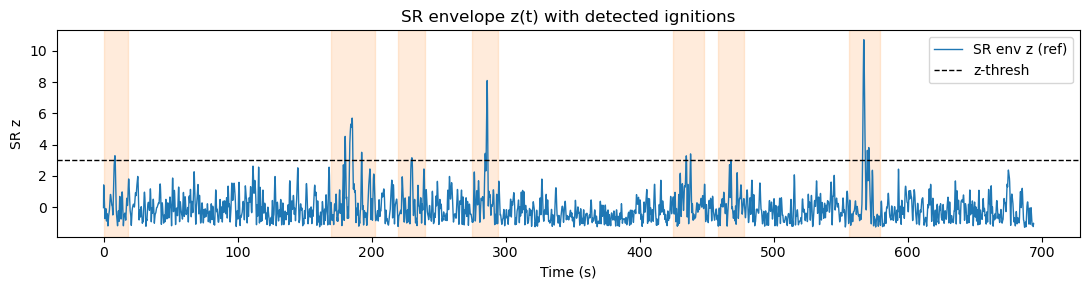

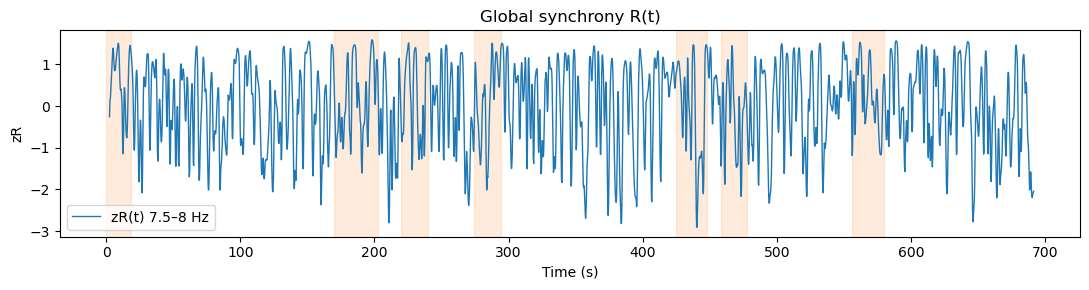

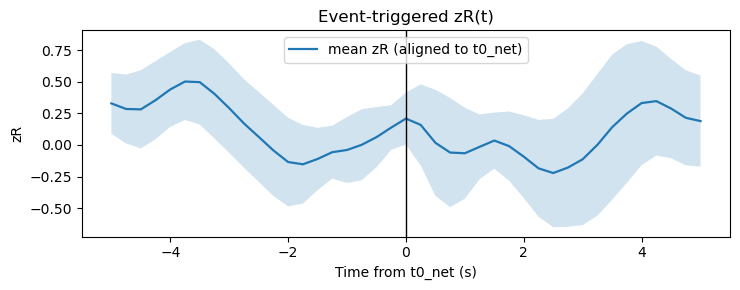

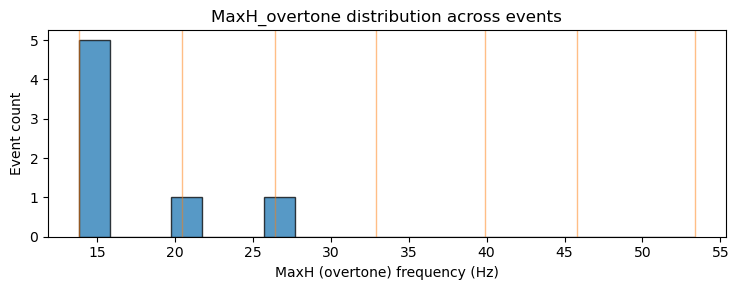


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.5–8.0 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.747 13.844 20.427 26.392 32.901 39.875 45.807 53.364]

Events detected: 7
  Duration (s)           — median [IQR]: 20.00 [20.00, 23.26]
  SR z max (ref)         — median [IQR]: 3.41 [3.23, 6.90]
  SR z mean (±5 s)       — median [IQR]: 1.00 [0.39, 1.35]
  MSC@~7.83 (virtual)    — median [IQR]: 0.53 [0.33, 0.83]
  Coverage of recording  — 22.66%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 9.44 [4.12, 15.43]
  HSI (harmonic stack)   — median [IQR]: 0.39 [0.22, 0.62]
  PEL Γ→θ lag (s)        — median [IQR]: 0.05 [0.05, 0.05]
  Seed ROI distribution  —  frontal: 3 (43%), parietal: 3 (43%), temporal: 1 (14%)
  Spread time (s

In [35]:
import detect_ignition

out, IGNITION_WINDOWS = detect_ignition.detect_ignitions_session(
    RECORDS, eeg_channels=ELECTRODES,
    z_thresh=3,R_band=(7.5,8),
    sr_reference='auto-SSD', seed_method='latency',
    pel_band=(35,58), 
    harmonics_hz=HARMONICS,
    eta_pre_sec = 5.0, eta_post_sec = 5.0,
    out_dir='exports_ignitions/S01'
)

# Batch

## Epoc X


=== Processing test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp ===

Estimate SR harmonics: ['7.75', '13.84', '20.43', '26.71', '33.83', '39.88', '46.03', '53.36']
Ignition windows (rounded, whole seconds): [(0, 19), (169, 203), (219, 240), (274, 295), (424, 448), (458, 479), (556, 580)]
Saved → exports_ignitions_batch/EPOCX/S1/ignition_windows.json


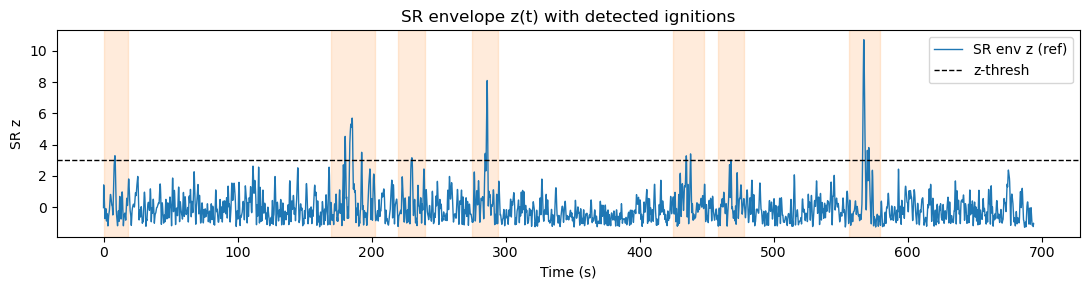

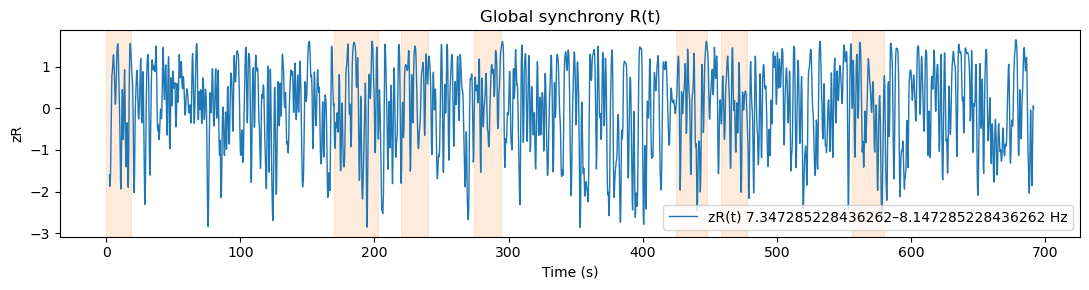

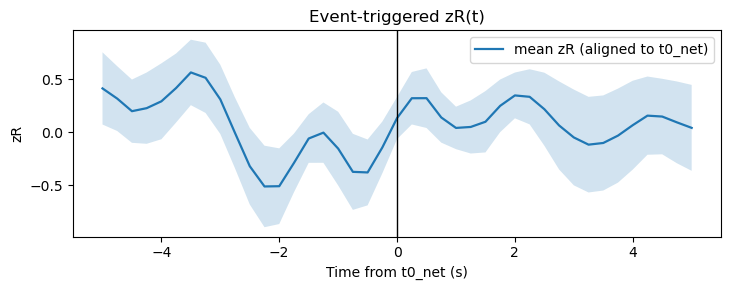

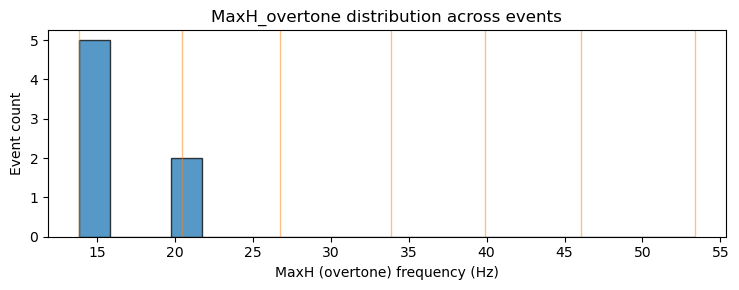


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.3–8.1 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.747 13.844 20.427 26.714 33.835 39.875 46.026 53.364]

Events detected: 7
  Duration (s)           — median [IQR]: 20.00 [20.00, 23.26]
  SR z max (ref)         — median [IQR]: 3.41 [3.23, 6.90]
  SR z mean (±5 s)       — median [IQR]: 1.00 [0.39, 1.35]
  MSC@~7.83 (virtual)    — median [IQR]: 0.53 [0.33, 0.83]
  Coverage of recording  — 22.66%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 9.44 [4.12, 15.43]
  HSI (harmonic stack)   — median [IQR]: 0.38 [0.21, 0.64]
  PEL Γ→θ lag (s)        — median [IQR]: 0.05 [0.05, 0.05]
  Seed ROI distribution  —  frontal: 3 (43%), parietal: 3 (43%), temporal: 1 (14%)
  Spread time (s

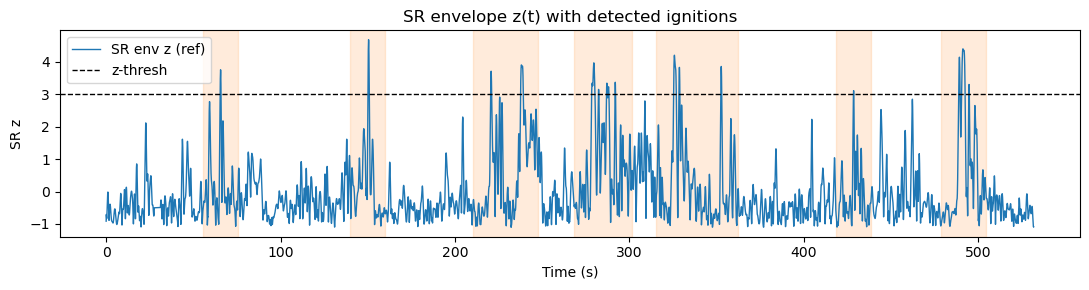

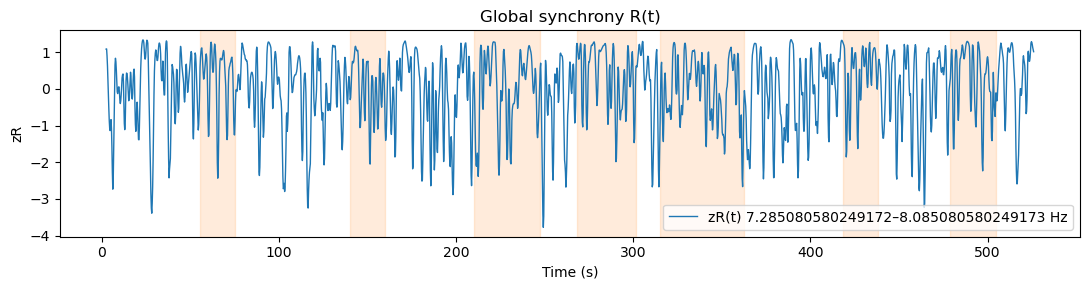

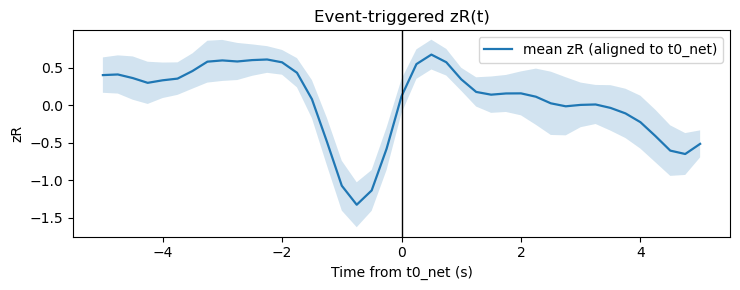

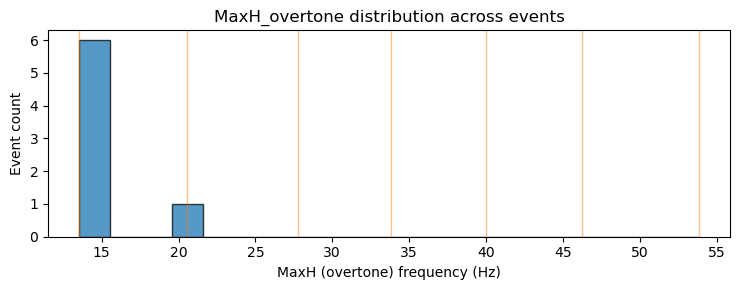


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.3–8.1 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.685 13.53  20.522 27.745 33.803 40.022 46.249 53.855]

Events detected: 7
  Duration (s)           — median [IQR]: 25.78 [20.00, 35.26]
  SR z max (ref)         — median [IQR]: 3.97 [3.83, 4.30]
  SR z mean (±5 s)       — median [IQR]: 0.83 [0.45, 1.20]
  MSC@~7.83 (virtual)    — median [IQR]: 0.44 [0.37, 0.53]
  Coverage of recording  — 38.24%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 12.82 [7.58, 17.99]
  HSI (harmonic stack)   — median [IQR]: 0.35 [0.23, 0.35]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 3 (43%), parietal: 2 (29%), occipital: 1 (14%), temporal: 1 (14%)
  Spread 

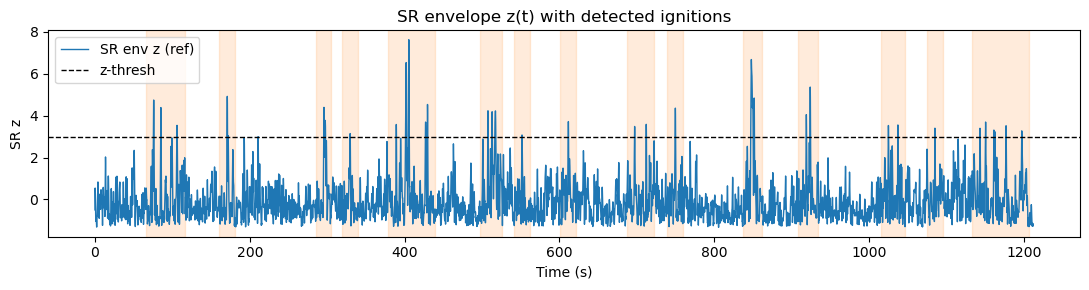

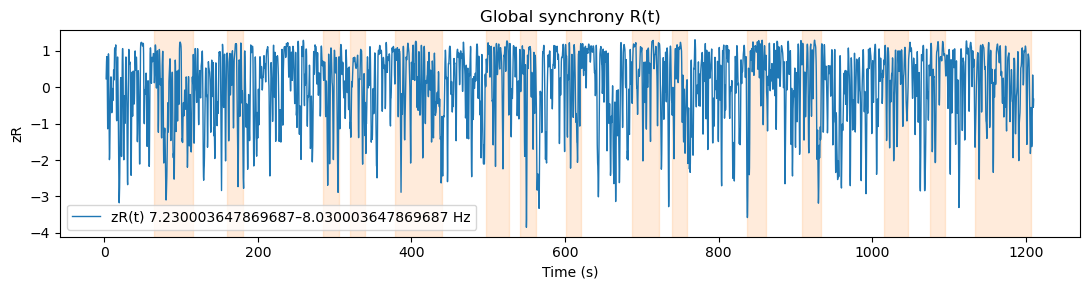

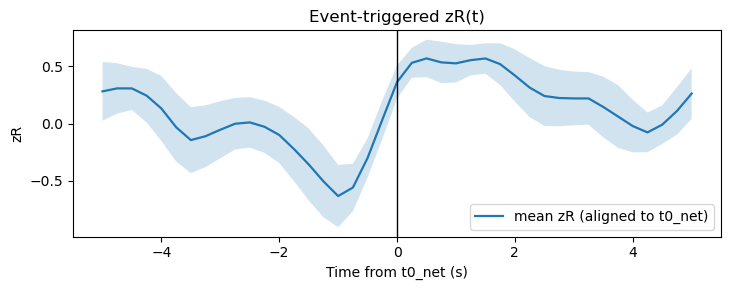

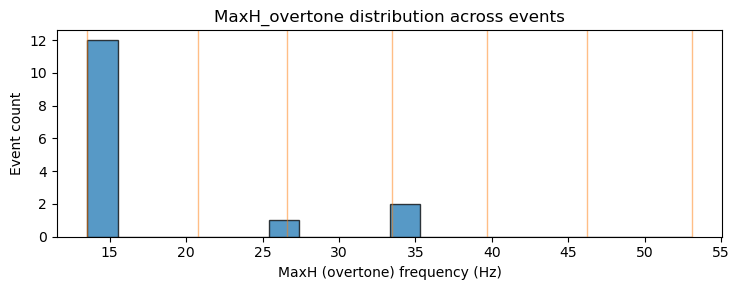


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.2–8.0 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.63  13.53  20.754 26.623 33.499 39.691 46.243 53.118]

Events detected: 15
  Duration (s)           — median [IQR]: 24.01 [20.00, 33.63]
  SR z max (ref)         — median [IQR]: 4.23 [3.57, 4.83]
  SR z mean (±5 s)       — median [IQR]: 0.41 [0.23, 0.61]
  MSC@~7.83 (virtual)    — median [IQR]: 0.34 [0.20, 0.70]
  Coverage of recording  — 38.76%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 10.09 [5.29, 16.39]
  HSI (harmonic stack)   — median [IQR]: 0.41 [0.31, 0.56]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 8 (53%), parietal: 4 (27%), occipital: 2 (13%), temporal: 1 (7%)
  Spread 

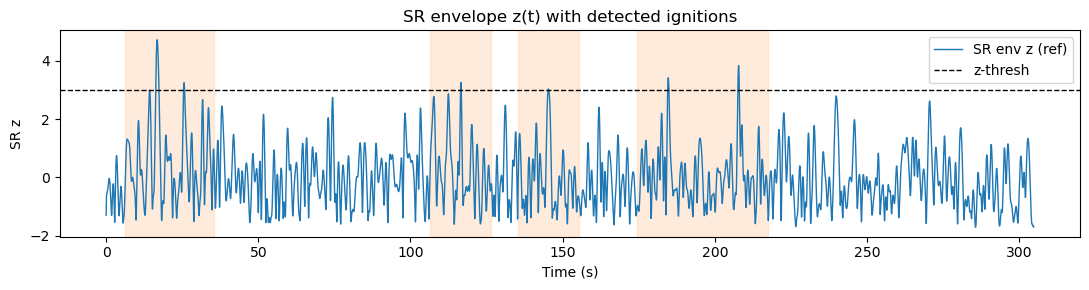

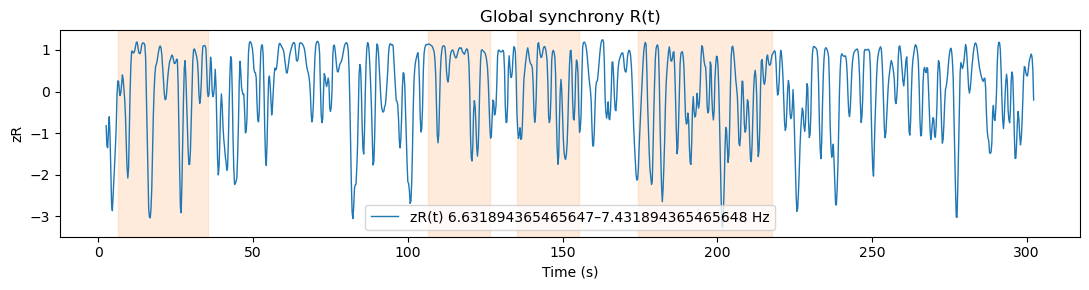

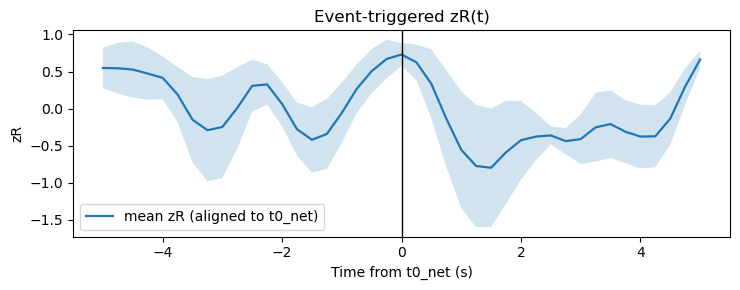

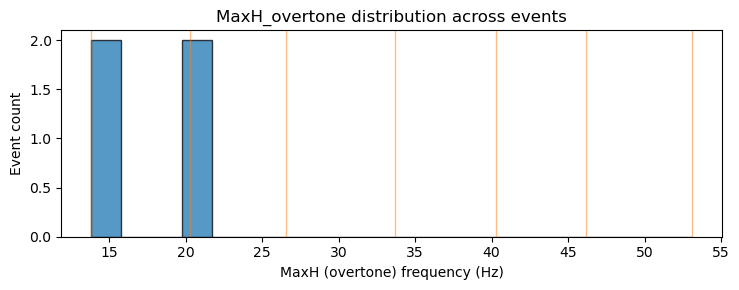


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.6–7.4 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.032 13.825 20.29  26.554 33.682 40.316 46.184 53.105]

Events detected: 4
  Duration (s)           — median [IQR]: 24.58 [20.00, 32.63]
  SR z max (ref)         — median [IQR]: 3.55 [3.20, 4.06]
  SR z mean (±5 s)       — median [IQR]: 0.35 [0.30, 0.48]
  MSC@~7.83 (virtual)    — median [IQR]: 0.27 [0.15, 0.36]
  Coverage of recording  — 36.82%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 3.37 [2.06, 5.33]
  HSI (harmonic stack)   — median [IQR]: 0.94 [0.70, 1.07]
  PEL Γ→θ lag (s)        — median [IQR]: -1.49 [-1.49, -1.49]
  Seed ROI distribution  —  temporal: 2 (50%), occipital: 1 (25%), parietal: 1 (25%)
  Spread tim

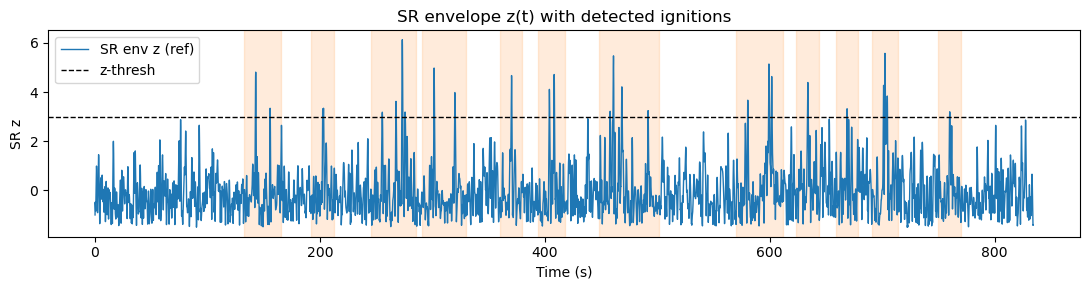

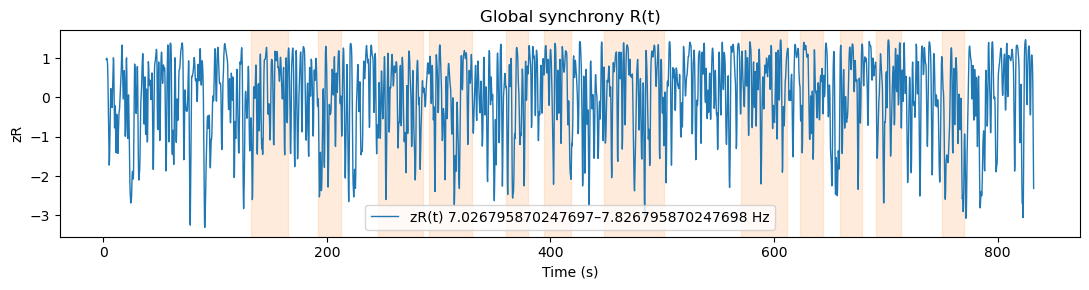

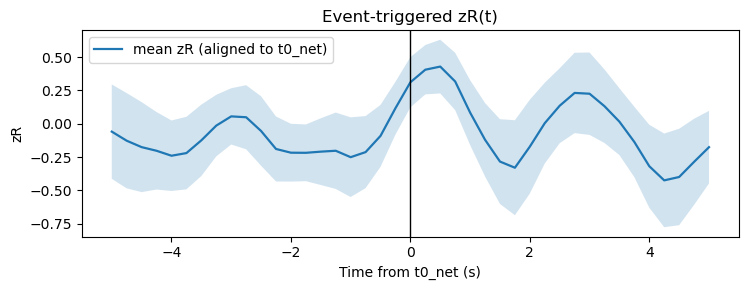

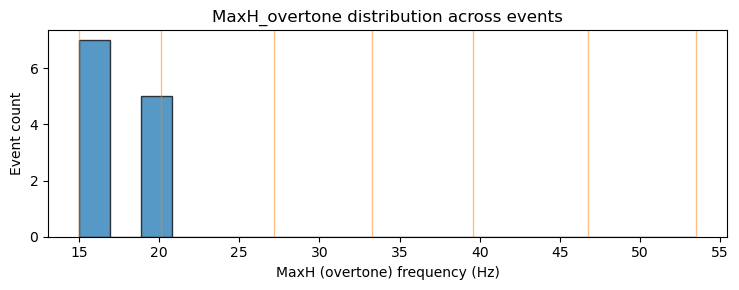


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.0–7.8 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.427 15.    20.094 27.168 33.283 39.599 46.759 53.485]

Events detected: 12
  Duration (s)           — median [IQR]: 23.44 [20.00, 38.94]
  SR z max (ref)         — median [IQR]: 4.76 [4.13, 5.23]
  SR z mean (±5 s)       — median [IQR]: 0.45 [0.35, 0.55]
  MSC@~7.83 (virtual)    — median [IQR]: 0.14 [0.06, 0.25]
  Coverage of recording  — 42.39%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.78 [2.50, 10.02]
  HSI (harmonic stack)   — median [IQR]: 0.76 [0.59, 0.97]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 5 (42%), parietal: 3 (25%), temporal: 2 (17%), occipital: 2 (17%)
  Spread 

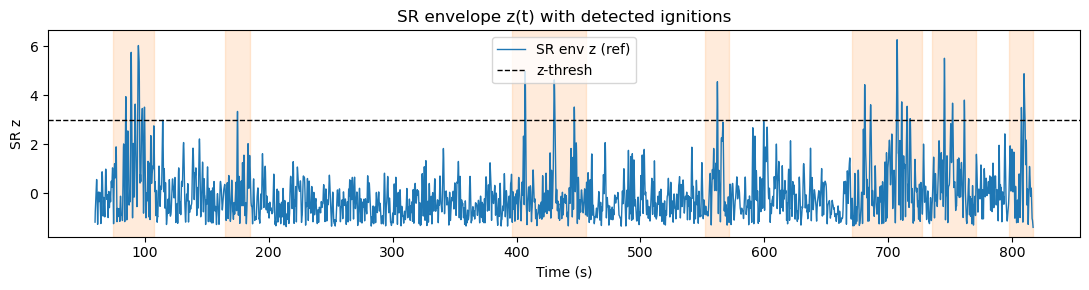

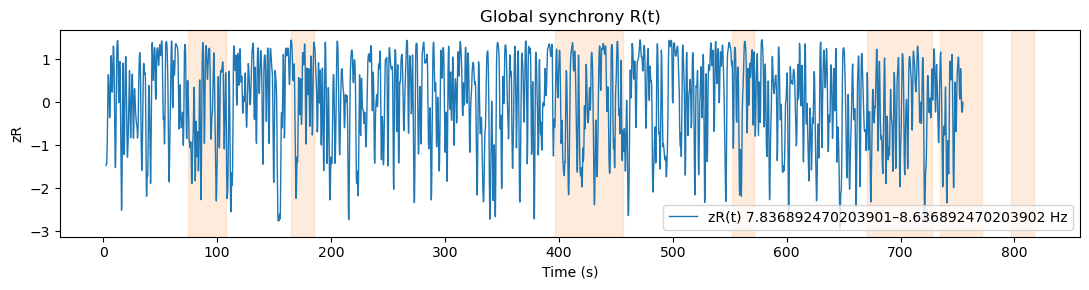

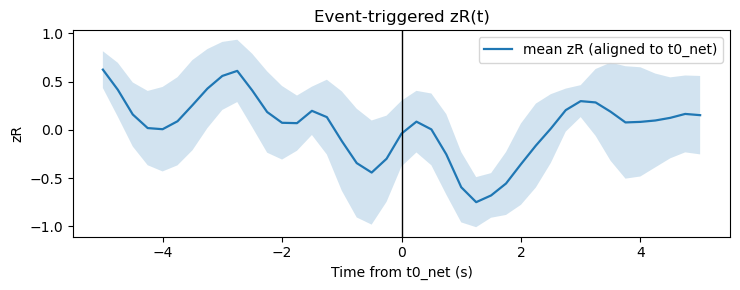

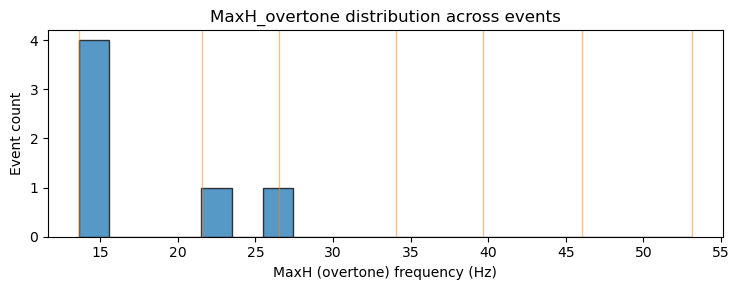


=== Ignition Detection — Session Summary ===
SR reference: EEG.F4
EEG channels (n=14): AF3, AF4, F7, F8, F3, F4, FC5, FC6, P7, P8, T7, T8, O1, O2
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.8–8.6 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.237 13.619 21.543 26.533 34.036 39.687 46.051 53.129]

Events detected: 6
  Duration (s)           — median [IQR]: 34.67 [23.29, 51.68]
  SR z max (ref)         — median [IQR]: 2.19 [2.09, 4.22]
  SR z mean (±5 s)       — median [IQR]: 0.73 [0.48, 0.96]
  MSC@~7.83 (virtual)    — median [IQR]: 0.28 [0.23, 0.30]
  Coverage of recording  — 29.86%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.04 [4.55, 9.57]
  HSI (harmonic stack)   — median [IQR]: 1.11 [0.81, 1.20]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 4 (67%), occipital: 1 (17%), temporal: 1 (17%)
  Spread time (s)        — med

In [36]:
import traceback

files = [
    'data/test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp.csv',
    'data/Test_06.11.20_14.28.18.md.pm.bp.csv',
    'data/20201229_29.12.20_11.27.57.md.pm.bp.csv',
    'data/med_EPOCX_111270_2021.06.12T09.50.52.04.00.md.bp.csv',
    'data/binaural_EPOCX_111270_2021.06.17T10.04.52.04.00.md.bp.csv',   
    'data/hyp_02.01.21_13.51.16.md.pm.bp.csv'
    # 'data/Quality Assessment_MM_EPOCX_111270_2021.02.16T10.51.08.05.00.md.mc.pm.fe.bp.csv'
]

# 2) Output root for all sessions
ROOT_OUT = 'exports_ignitions_batch'
os.makedirs(ROOT_OUT, exist_ok=True)

# 4) Collect per-session summaries
master_rows = []
sc = 1
for fpath in files:

    records = utilities.load_eeg_csv(fpath, electrodes=ELECTRODES)
    if fpath == 'data/hyp_02.01.21_13.51.16.md.pm.bp.csv':
        records = records.iloc[7680:-3840].reset_index(drop=True).copy()
    
    session_name = os.path.splitext(os.path.basename(fpath))[0]
    out_dir = os.path.join(ROOT_OUT, session_name)
    try:
        print(f"\n=== Processing {session_name} ===")

        harms = harmonics.estimate_sr_harmonics(records, sr_channel='EEG.F4', fs=None,
                    f_can=(7.83, 14.3, 20.8, 27.3, 33.8, 40.3, 46.8, 53.3),
                    search_halfband=0.8, nperseg_sec=32.0, overlap=0.5)

        formatted_list_fstring = [f"{num:.2f}" for num in harms]
        print(f"\nEstimate SR harmonics: {formatted_list_fstring}")
        

        out, ign_windows = detect_ignition.detect_ignitions_session(
            records, eeg_channels=ELECTRODES,
            z_thresh=3,R_band=(harms[0]-0.4,harms[0]+0.4),
            sr_reference='auto-SSD', seed_method='latency',
            pel_band=(35,58), 
            harmonics_hz=harms,
            eta_pre_sec = 5.0, eta_post_sec = 5.0,
            out_dir='exports_ignitions_batch/EPOCX/S'+ str(sc)
        )
        print("\n")
        sc = sc + 1
                
        # Store summary row
        summ = out['summary'].copy()
        summ['session'] = session_name[:30]+" ..."
        summ['n_events'] = summ.get('n_events', 0)
        master_rows.append(summ)

    except Exception as e:
        print(f"[ERROR] {session_name}: {e}")
        traceback.print_exc()
        # add a failed row so you keep the log complete
        master_rows.append({'session': session_name[:20]+" ...", 'n_events': np.nan, 'error': str(e)})

# 5) Save master summary across sessions
master_df = pd.DataFrame(master_rows)
master_csv = os.path.join(ROOT_OUT, 'master_ignition_summary-EPOCX.csv')
master_df.to_csv(master_csv, index=False)

print("\n=== Batch complete ===")
print("Master summary saved to:", master_csv)
print(master_df.fillna('').to_string(index=False))

## Insight

In [28]:
INSIGHT_ELECTRODES = ['EEG.AF3','EEG.AF4','EEG.T7','EEG.T8', 'EEG.Pz']

# 1) List your input files (CSV paths)
insight_files = [
    'data/testing_INSIGHT2_111270_2024.02.10T10.25.53.06.00.md.pm.bp.csv',
    'data/shit_INSIGHT2_111270_2024.02.10T13.00.17.06.00.md.pm.bp.csv',
    'data/testing_INSIGHT2_111270_2024.02.12T10.25.21.06.00.md.pm.bp.csv',
    'data/testing_INSIGHT2_111270_2024.02.13T08.26.34.06.00.md.pm.bp.csv',
    'data/testing_INSIGHT2_111270_2024.02.15T11.43.15.06.00.md.pm.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.01T11.19.02.06.00.md.pm.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.02T10.03.06.06.00.md.pm.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.02T10.17.57.06.00.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.05T07.14.31.06.00.md.pm.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.05T07.02.55.06.00.bp.csv',
    'data/tet_INSIGHT2_111270_2024.03.05T07.49.33.06.00.md.pm.bp.csv',
    'data/test_INSIGHT2_111270_2024.03.08T12.26.06.06.00.md.pm.bp.csv'
]



=== Processing testing_INSIGHT2_111270_2024.02.10T10.25.53.06.00.md.pm.bp ===

Estimate SR harmonics: ['7.84', '13.91', '20.75', '26.50', '33.22', '41.05', '46.00', '53.29']
Ignition windows (rounded, whole seconds): [(37, 66), (94, 115), (170, 191), (201, 222)]
Saved → exports_ignitions_batch/INSIGHT/S1/ignition_windows.json


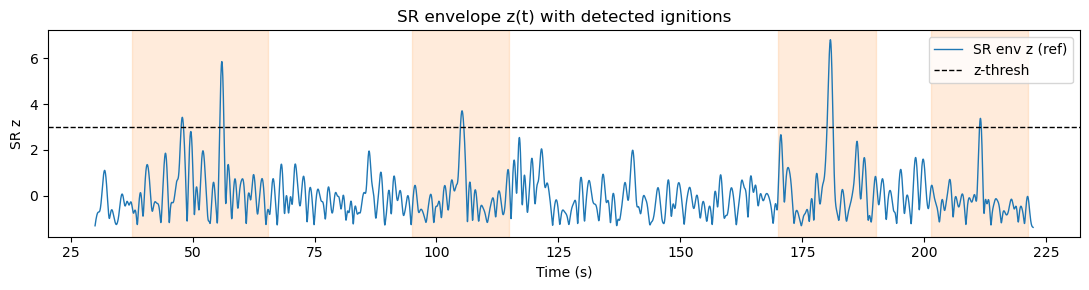

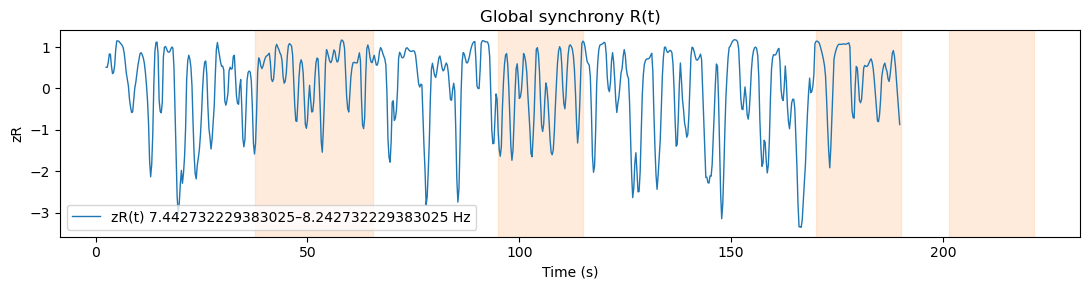

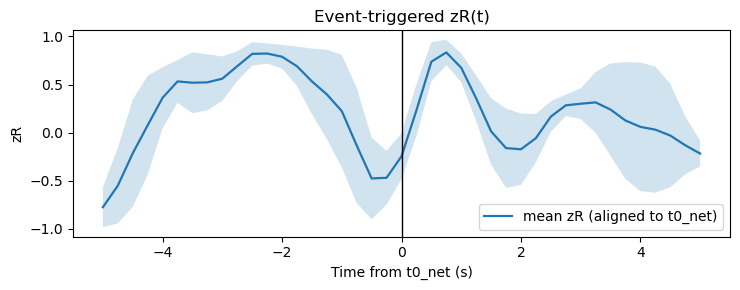

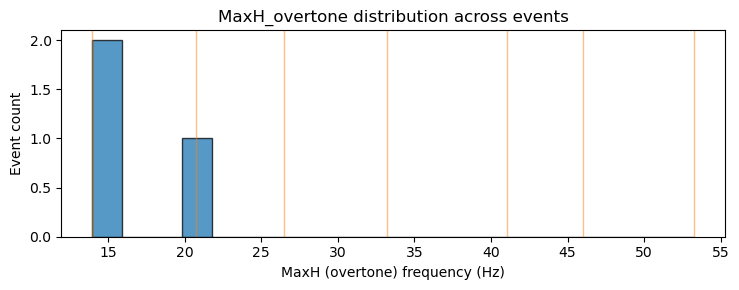


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.4–8.2 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.843 13.912 20.747 26.502 33.22  41.051 46.004 53.286]

Events detected: 3
  Duration (s)           — median [IQR]: 20.00 [20.00, 23.95]
  SR z max (ref)         — median [IQR]: 1.99 [1.97, 2.68]
  SR z mean (±5 s)       — median [IQR]: 0.53 [0.41, 0.62]
  MSC@~7.83 (virtual)    — median [IQR]: 0.40 [0.27, 0.42]
  Coverage of recording  — 35.30%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 15.20 [12.99, 21.07]
  HSI (harmonic stack)   — median [IQR]: 0.61 [0.53, 0.71]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 3 (100%)
  Spread time (s)        — median [IQR]: 0.00 [0.00, 0.00]
  Synchronized fraction  — median [IQR]: 0.20

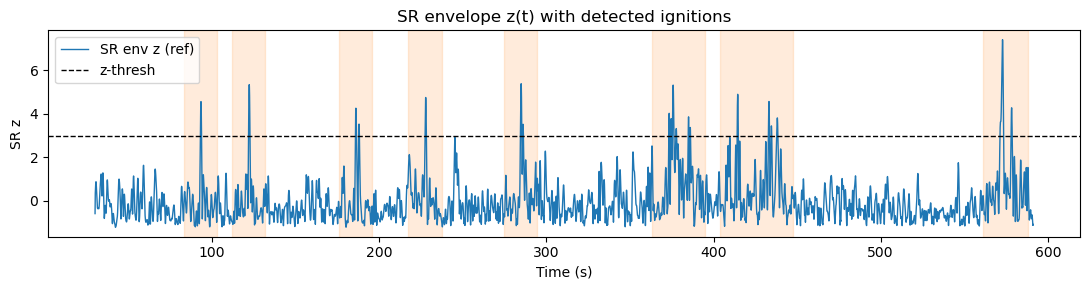

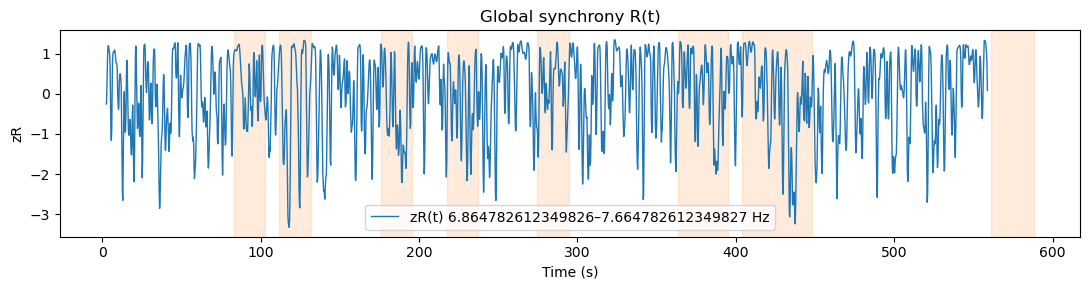

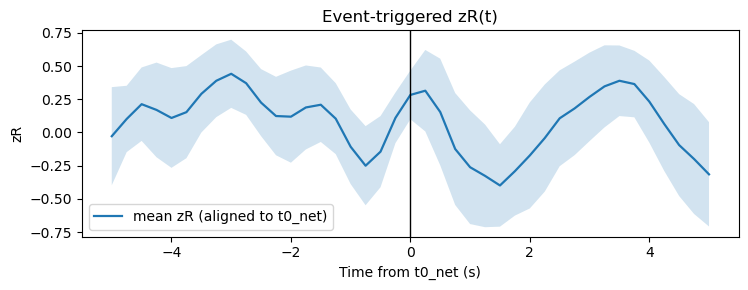

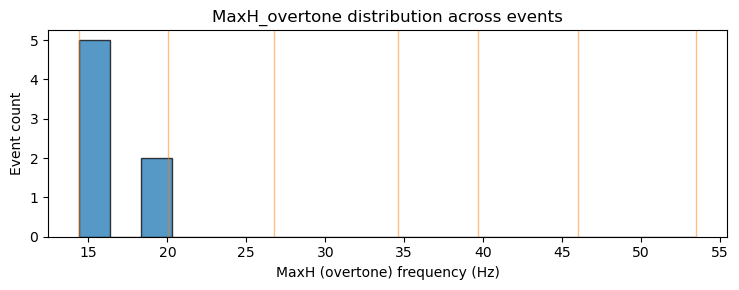


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.9–7.7 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.265 14.402 20.03  26.735 34.574 39.636 46.028 53.47 ]

Events detected: 7
  Duration (s)           — median [IQR]: 20.00 [20.00, 25.81]
  SR z max (ref)         — median [IQR]: 2.12 [1.32, 4.36]
  SR z mean (±5 s)       — median [IQR]: 0.49 [0.41, 0.73]
  MSC@~7.83 (virtual)    — median [IQR]: 0.49 [0.26, 0.56]
  Coverage of recording  — 31.24%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 14.68 [9.48, 16.16]
  HSI (harmonic stack)   — median [IQR]: 0.39 [0.33, 0.51]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 4 (57%), temporal: 3 (43%)
  Spread time (s)        — median [IQR]: 2.04 [1.10, 2.05]
  Synchronized fraction  — m

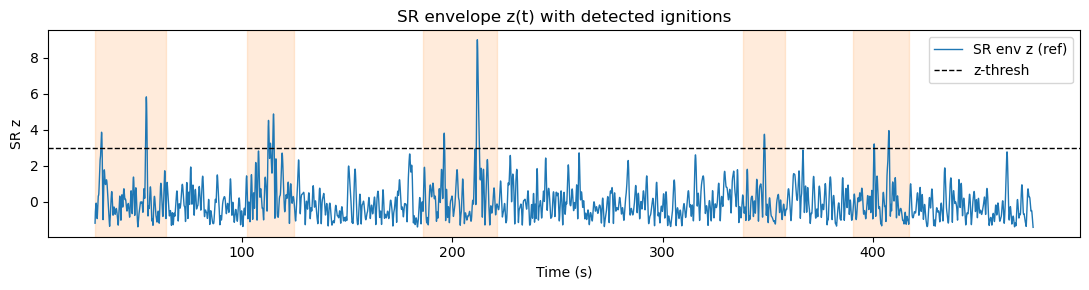

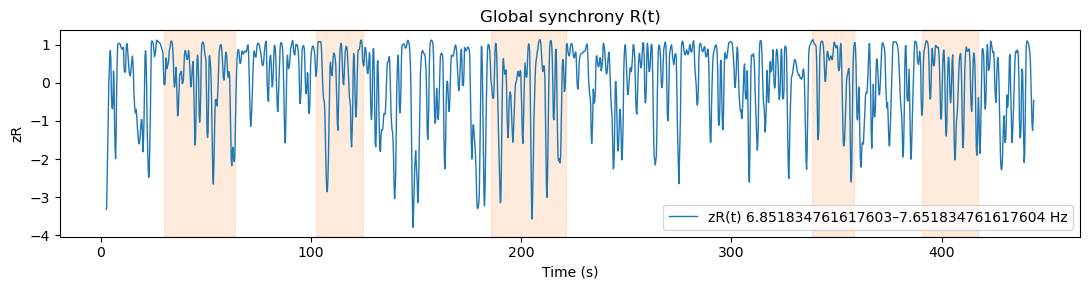

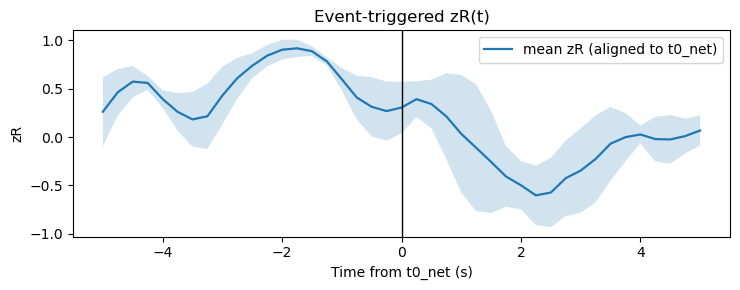

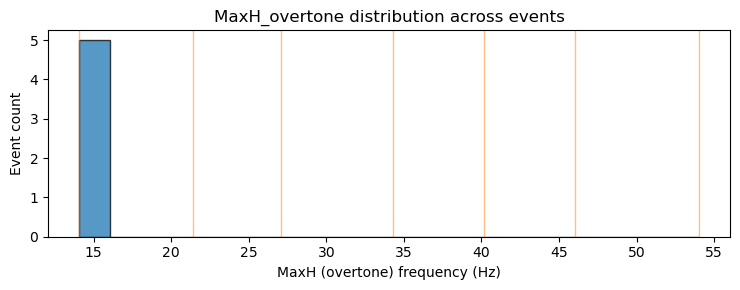


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.9–7.7 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.252 14.068 21.399 27.095 34.288 40.176 46.004 54.021]

Events detected: 5
  Duration (s)           — median [IQR]: 26.80 [22.26, 33.98]
  SR z max (ref)         — median [IQR]: 1.93 [1.88, 1.98]
  SR z mean (±5 s)       — median [IQR]: 0.15 [0.04, 0.26]
  MSC@~7.83 (virtual)    — median [IQR]: 0.20 [0.10, 0.70]
  Coverage of recording  — 31.05%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.78 [6.32, 17.20]
  HSI (harmonic stack)   — median [IQR]: 0.34 [0.24, 0.51]
  PEL Γ→θ lag (s)        — median [IQR]: -1.30 [-1.30, -1.30]
  Seed ROI distribution  —  frontal: 4 (80%), temporal: 1 (20%)
  Spread time (s)        — median [IQR]: 0.00 [0.00, 0.16]
  Synchroniz

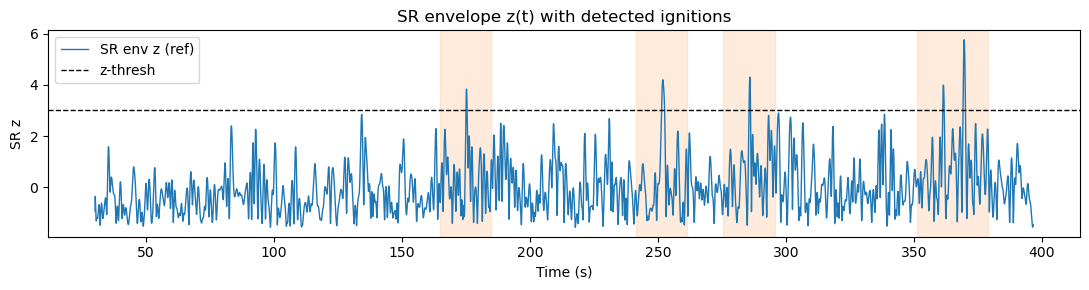

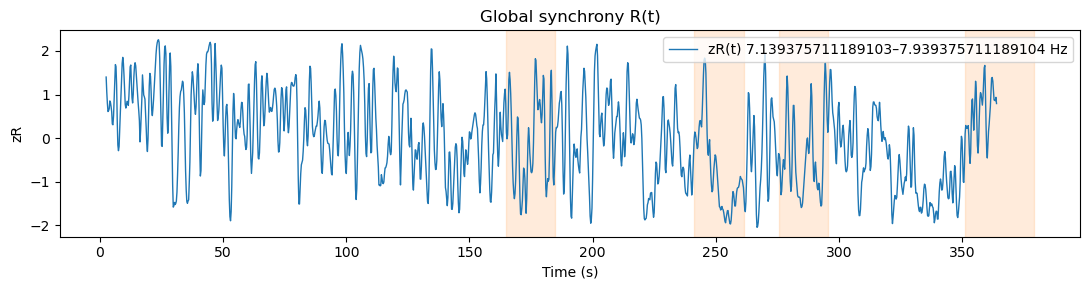

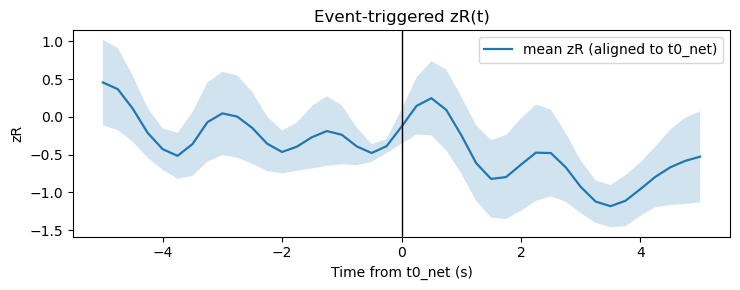

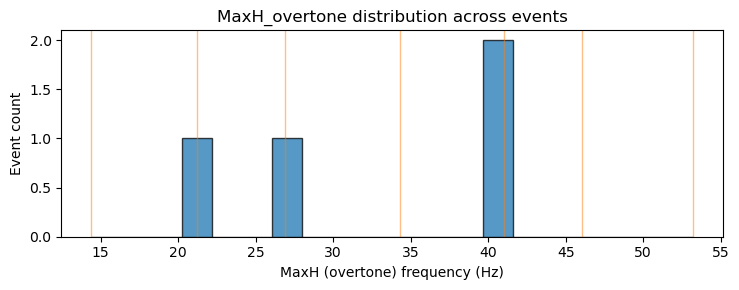


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.1–7.9 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.539 14.418 21.202 26.872 34.291 41.04  46.034 53.224]

Events detected: 4
  Duration (s)           — median [IQR]: 20.00 [20.00, 21.98]
  SR z max (ref)         — median [IQR]: 2.50 [2.29, 2.96]
  SR z mean (±5 s)       — median [IQR]: 0.50 [0.34, 0.66]
  MSC@~7.83 (virtual)    — median [IQR]: 0.31 [0.19, 0.45]
  Coverage of recording  — 23.99%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 2.94 [2.67, 3.05]
  HSI (harmonic stack)   — median [IQR]: 2.33 [1.11, 4.15]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 2 (50%), parietal: 1 (25%), temporal: 1 (25%)
  Spread time (s)        — median [IQR]: 0.02 [0.00, 0.36]
  Synchroni

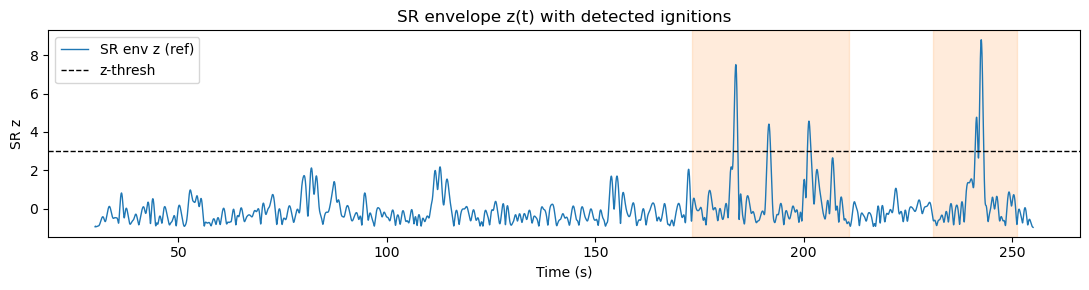

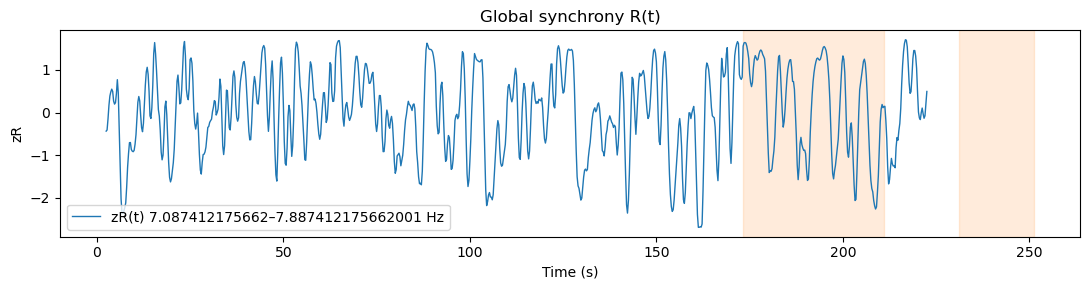

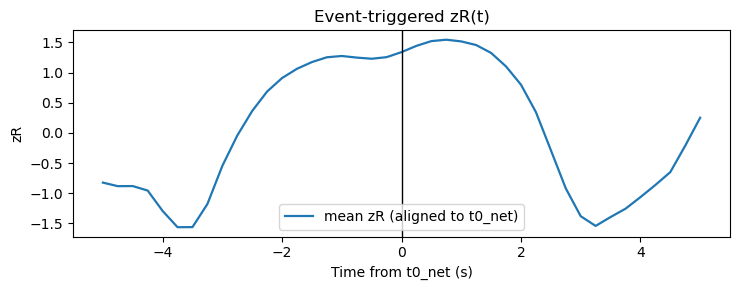

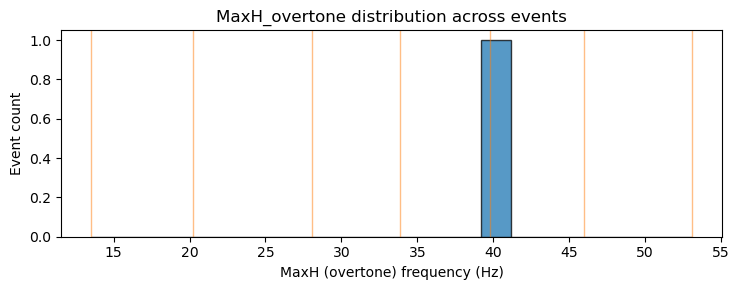


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.1–7.9 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.487 13.541 20.222 28.096 33.884 39.772 46.004 53.055]

Events detected: 1
  Duration (s)           — median [IQR]: 37.77 [37.77, 37.77]
  SR z max (ref)         — median [IQR]: 2.65 [2.65, 2.65]
  SR z mean (±5 s)       — median [IQR]: 0.79 [0.79, 0.79]
  MSC@~7.83 (virtual)    — median [IQR]: 0.61 [0.61, 0.61]
  Coverage of recording  — 16.78%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 9.11 [9.11, 9.11]
  HSI (harmonic stack)   — median [IQR]: 4.29 [4.29, 4.29]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  parietal: 1 (100%)
  Spread time (s)        — median [IQR]: 1.17 [1.17, 1.17]
  Synchronized fraction  — median [IQR]: 0.20 [

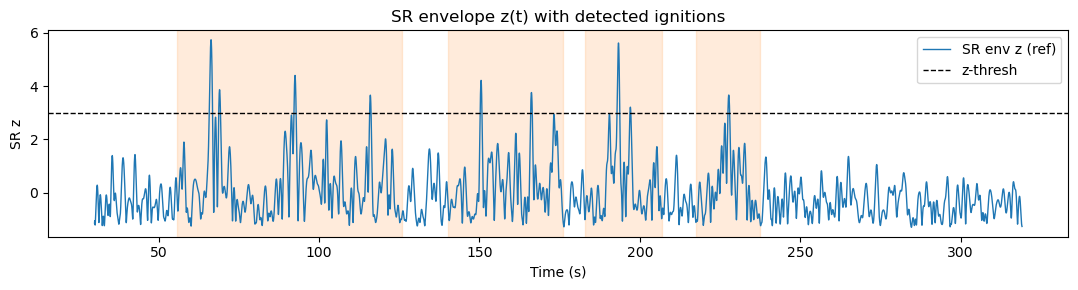

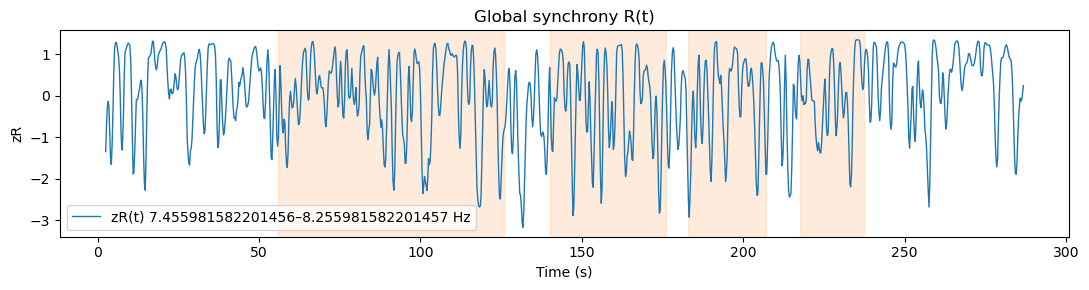

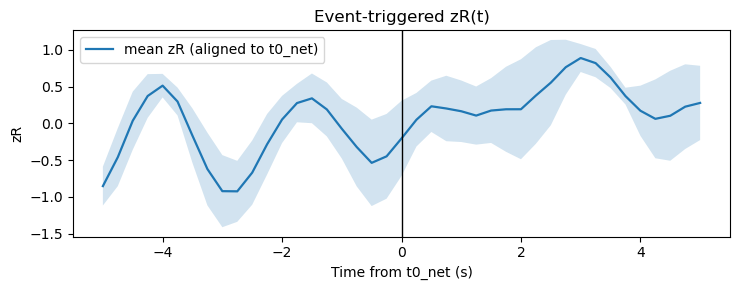

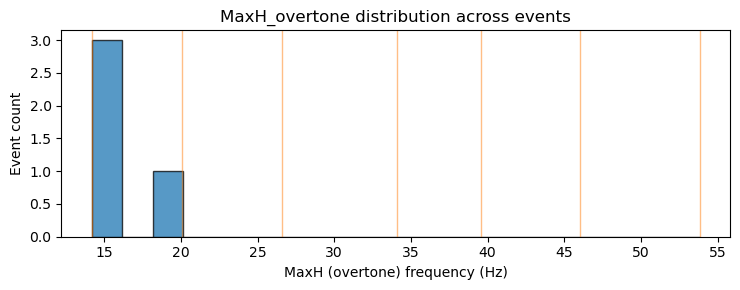


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.5–8.3 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.856 14.189 20.095 26.599 34.099 39.588 46.004 53.831]

Events detected: 4
  Duration (s)           — median [IQR]: 29.87 [23.01, 44.30]
  SR z max (ref)         — median [IQR]: 4.04 [3.09, 4.71]
  SR z mean (±5 s)       — median [IQR]: 0.99 [0.73, 1.11]
  MSC@~7.83 (virtual)    — median [IQR]: 0.73 [0.53, 0.76]
  Coverage of recording  — 51.79%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.75 [3.89, 9.15]
  HSI (harmonic stack)   — median [IQR]: 0.49 [0.39, 0.69]
  PEL Γ→θ lag (s)        — median [IQR]: 1.37 [1.37, 1.37]
  Seed ROI distribution  —  temporal: 2 (50%), frontal: 2 (50%)
  Spread time (s)        — median [IQR]: 0.07 [0.04, 0.07]
  Synchronized f

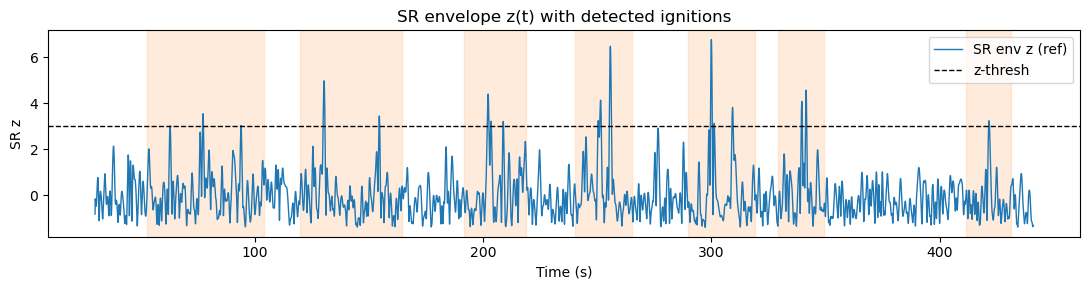

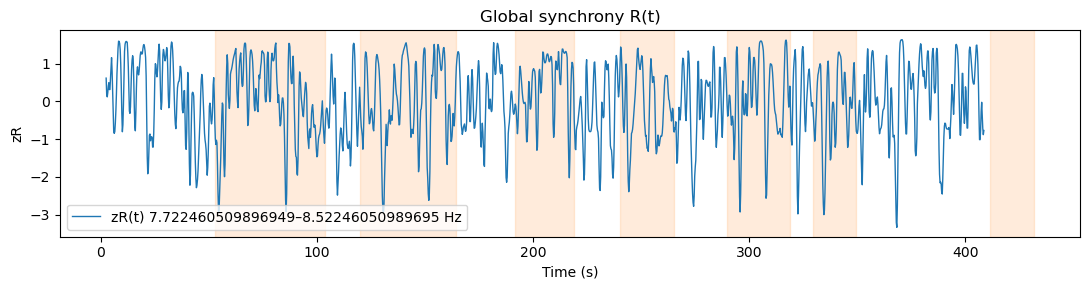

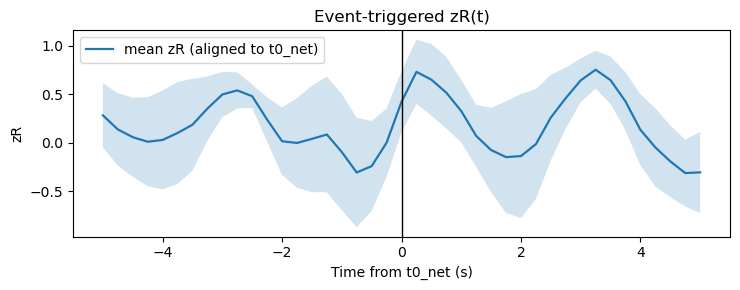

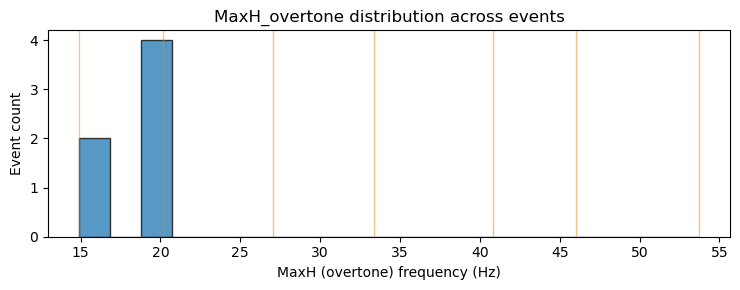


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.7–8.5 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.122 14.908 20.163 27.027 33.346 40.841 46.038 53.72 ]

Events detected: 6
  Duration (s)           — median [IQR]: 28.16 [25.48, 40.70]
  SR z max (ref)         — median [IQR]: 3.19 [2.64, 4.30]
  SR z mean (±5 s)       — median [IQR]: 0.56 [0.45, 0.66]
  MSC@~7.83 (virtual)    — median [IQR]: 0.55 [0.39, 0.65]
  Coverage of recording  — 47.90%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 12.21 [9.78, 18.35]
  HSI (harmonic stack)   — median [IQR]: 0.43 [0.31, 0.55]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 4 (67%), temporal: 2 (33%)
  Spread time (s)        — median [IQR]: 0.14 [0.10, 0.59]
  Synchronized fraction  — m

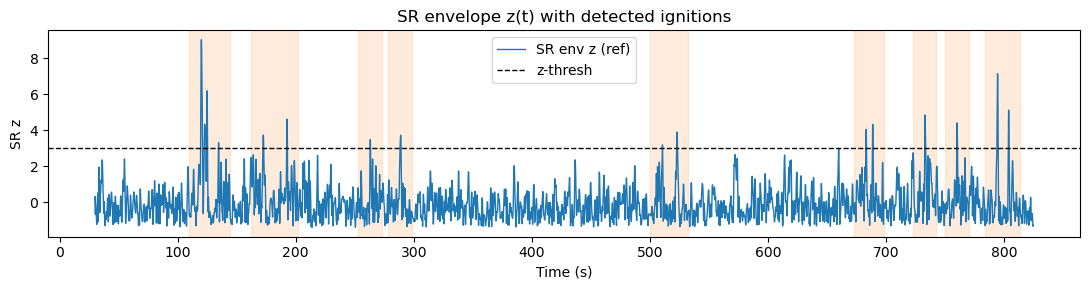

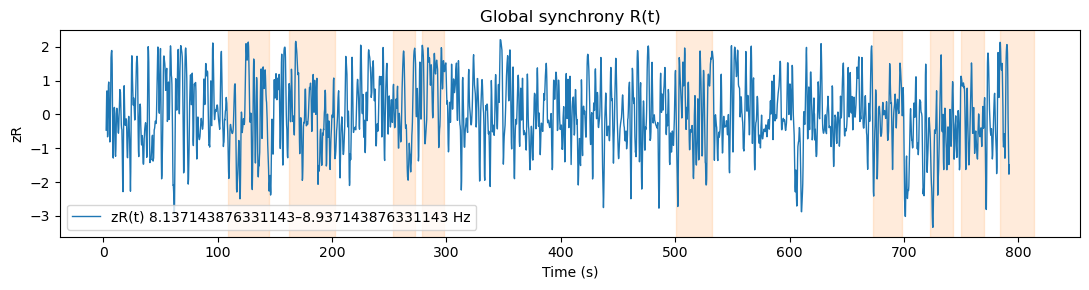

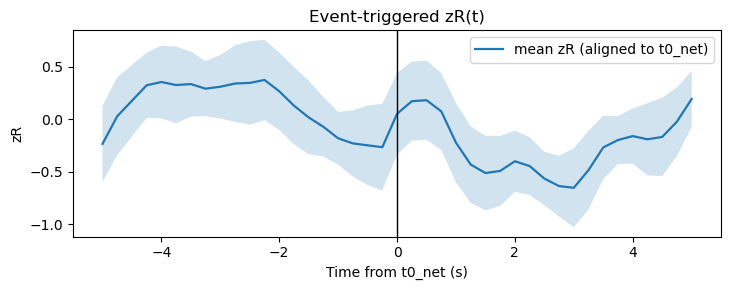

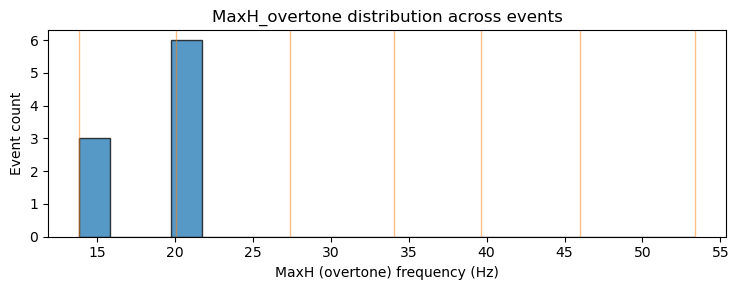


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 8.1–8.9 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.537 13.827 20.051 27.364 34.035 39.633 46.004 53.386]

Events detected: 9
  Duration (s)           — median [IQR]: 25.46 [20.00, 32.11]
  SR z max (ref)         — median [IQR]: 3.72 [1.74, 4.41]
  SR z mean (±5 s)       — median [IQR]: 0.49 [0.45, 0.57]
  MSC@~7.83 (virtual)    — median [IQR]: 0.31 [0.18, 0.48]
  Coverage of recording  — 30.51%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 8.85 [7.81, 12.04]
  HSI (harmonic stack)   — median [IQR]: 0.48 [0.35, 0.67]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 7 (78%), parietal: 1 (11%), temporal: 1 (11%)
  Spread time (s)        — median [IQR]: 0.85 [0.35, 1.88]
  Synchron

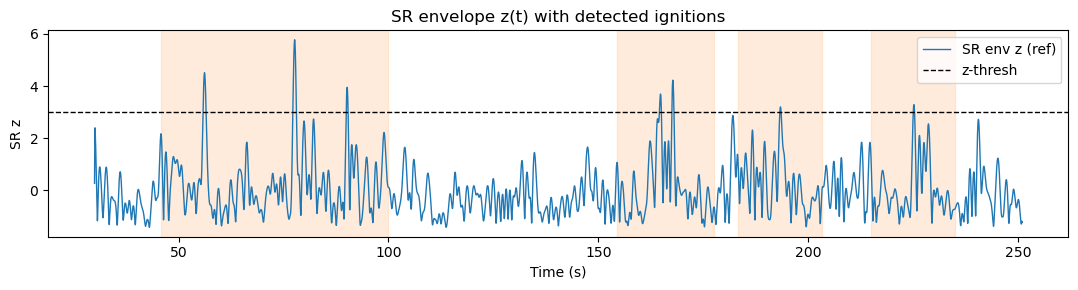

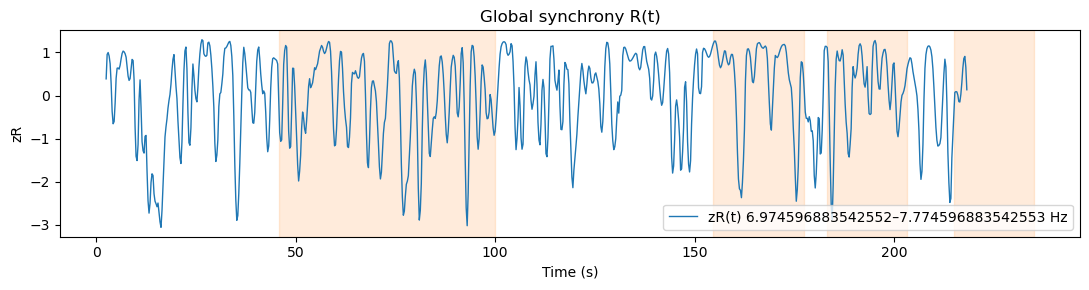

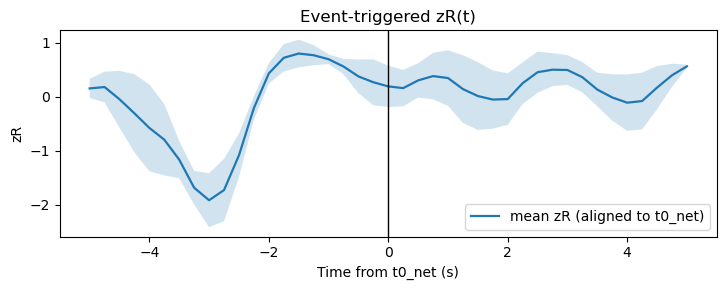

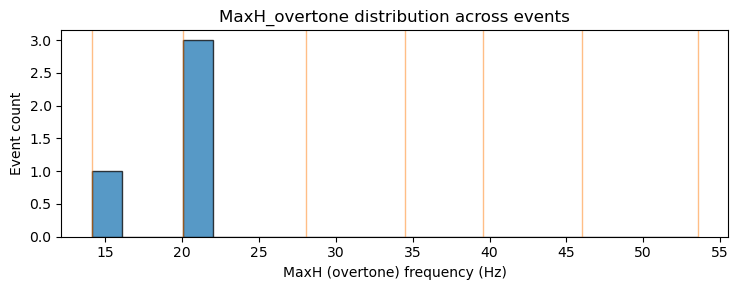


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.0–7.8 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.375 14.12  20.064 28.039 34.524 39.597 46.004 53.537]

Events detected: 4
  Duration (s)           — median [IQR]: 21.47 [20.00, 30.73]
  SR z max (ref)         — median [IQR]: 3.24 [2.71, 3.91]
  SR z mean (±5 s)       — median [IQR]: 0.41 [0.30, 0.55]
  MSC@~7.83 (virtual)    — median [IQR]: 0.32 [0.21, 0.43]
  Coverage of recording  — 52.98%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 5.23 [2.08, 10.46]
  HSI (harmonic stack)   — median [IQR]: 0.56 [0.41, 0.73]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 2 (50%), parietal: 1 (25%), temporal: 1 (25%)
  Spread time (s)        — median [IQR]: 0.15 [0.07, 0.16]
  Synchron

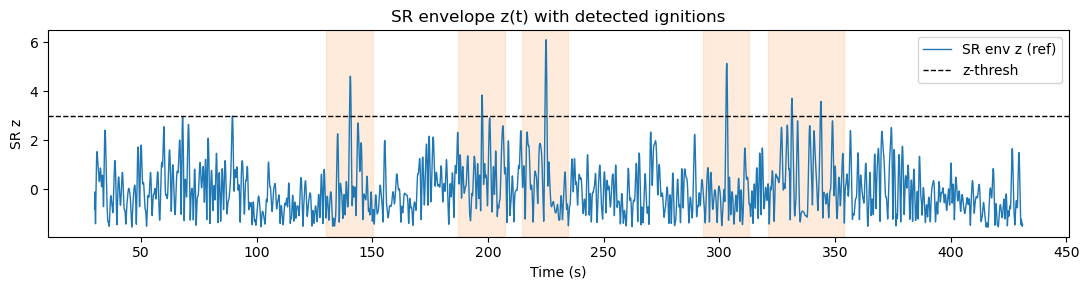

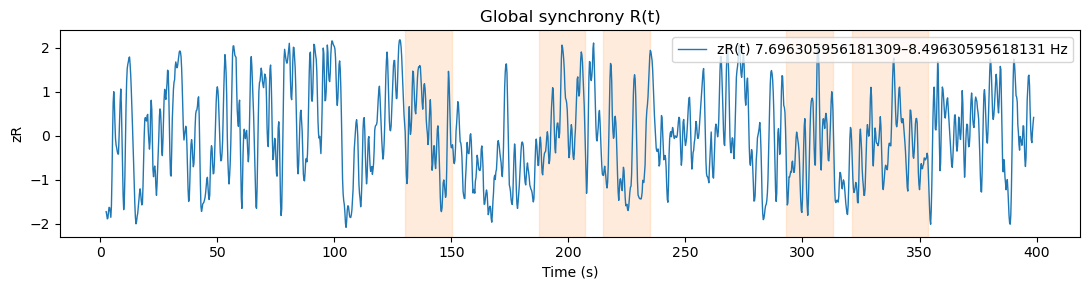

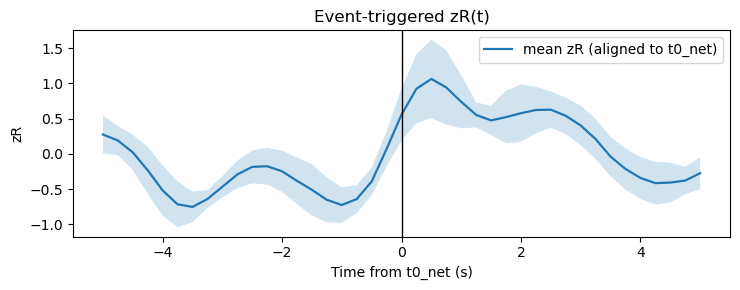

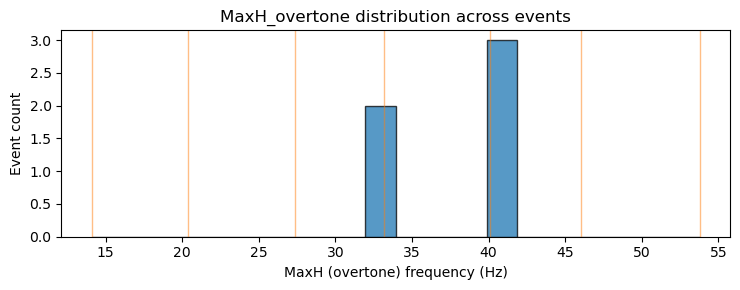


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.7–8.5 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.096 14.098 20.381 27.344 33.177 40.111 46.054 53.776]

Events detected: 5
  Duration (s)           — median [IQR]: 20.00 [20.00, 20.00]
  SR z max (ref)         — median [IQR]: 2.52 [2.16, 3.71]
  SR z mean (±5 s)       — median [IQR]: 0.61 [0.52, 0.66]
  MSC@~7.83 (virtual)    — median [IQR]: 0.27 [0.11, 0.29]
  Coverage of recording  — 28.06%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 3.19 [1.37, 8.37]
  HSI (harmonic stack)   — median [IQR]: 2.81 [1.52, 4.02]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 4 (80%), temporal: 1 (20%)
  Spread time (s)        — median [IQR]: 0.00 [0.00, 0.03]
  Synchronized fraction  — med

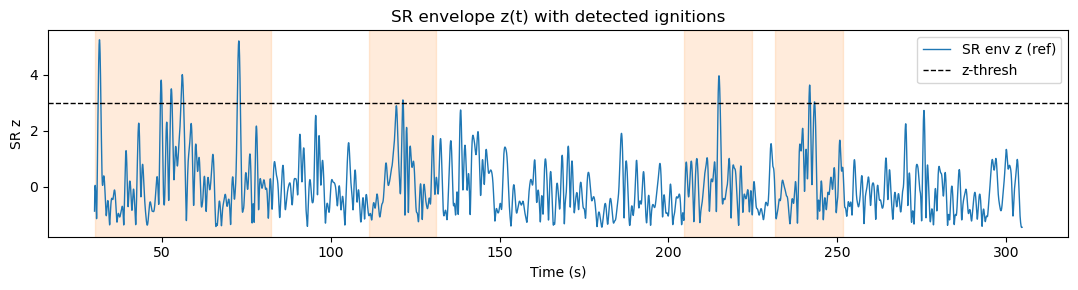

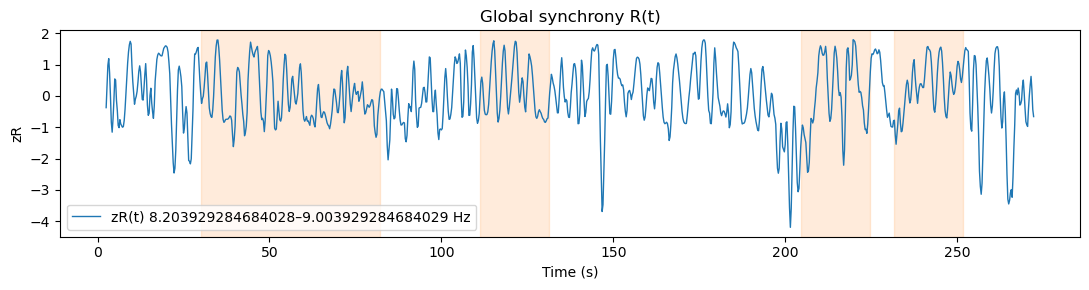

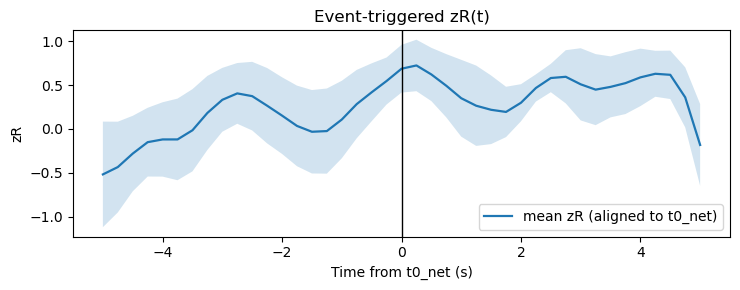

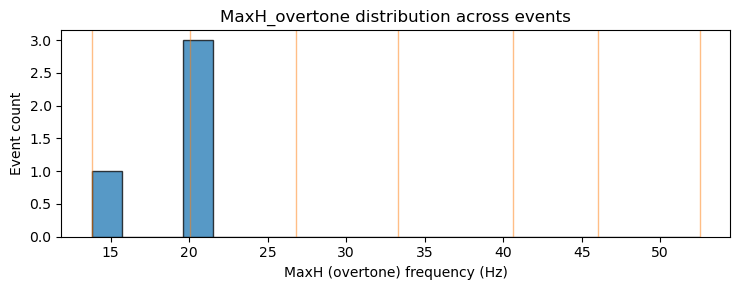


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 8.2–9.0 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.604 13.789 20.061 26.789 33.295 40.62  46.004 52.505]

Events detected: 4
  Duration (s)           — median [IQR]: 20.00 [20.00, 28.07]
  SR z max (ref)         — median [IQR]: 3.17 [2.53, 4.02]
  SR z mean (±5 s)       — median [IQR]: 0.52 [0.28, 0.64]
  MSC@~7.83 (virtual)    — median [IQR]: 0.35 [0.26, 0.37]
  Coverage of recording  — 40.87%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 9.22 [4.83, 12.58]
  HSI (harmonic stack)   — median [IQR]: 0.87 [0.76, 0.96]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 3 (75%), parietal: 1 (25%)
  Spread time (s)        — median [IQR]: 0.15 [0.11, 0.61]
  Synchronized fraction  — me

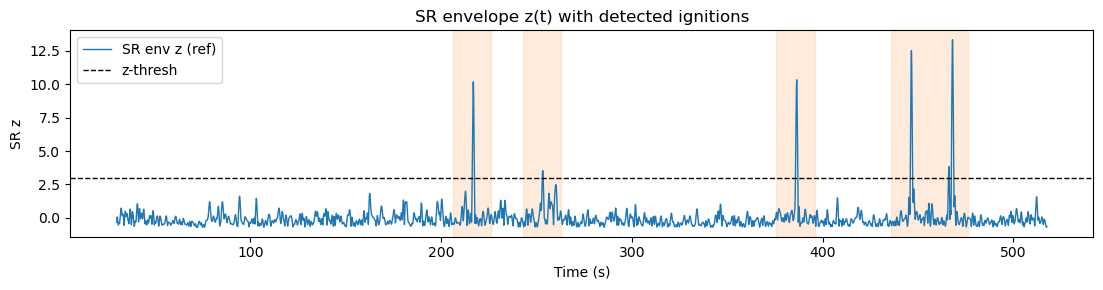

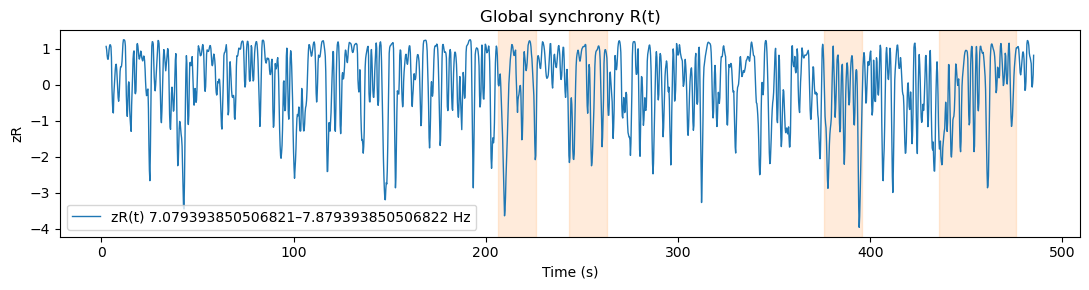

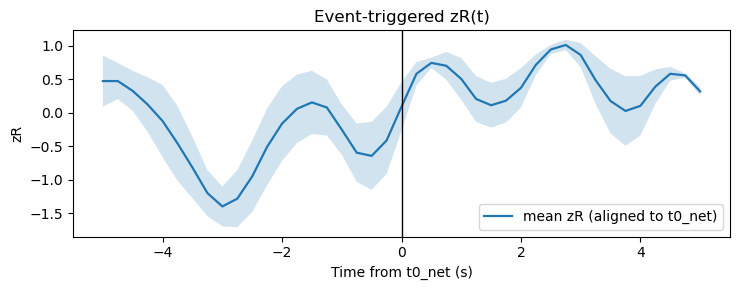

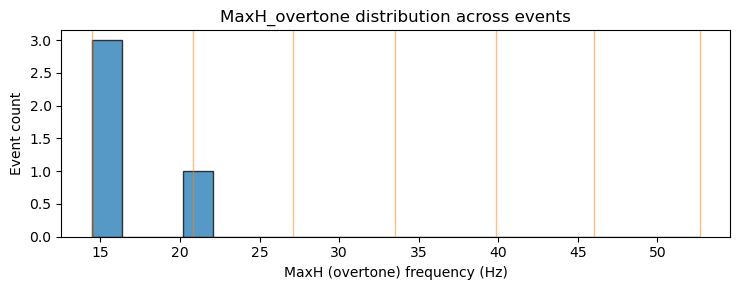


=== Ignition Detection — Session Summary ===
SR reference: EEG.Pz
EEG channels (n=5): AF3, AF4, T7, T8, Pz
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.1–7.9 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.479 14.454 20.795 27.084 33.54  39.829 46.004 52.656]

Events detected: 4
  Duration (s)           — median [IQR]: 20.00 [20.00, 25.01]
  SR z max (ref)         — median [IQR]: 2.52 [1.31, 5.99]
  SR z mean (±5 s)       — median [IQR]: 1.04 [0.89, 1.14]
  MSC@~7.83 (virtual)    — median [IQR]: 0.39 [0.34, 0.41]
  Coverage of recording  — 20.52%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 7.91 [6.94, 9.61]
  HSI (harmonic stack)   — median [IQR]: 0.97 [0.91, 1.05]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 4 (100%)
  Spread time (s)        — median [IQR]: 0.00 [0.00, 0.00]
  Synchronized fraction  — median [IQR]: 0.00 [0

In [37]:
# 2) Output root for all sessions
ROOT_OUT = 'exports_ignitions_batch'
os.makedirs(ROOT_OUT, exist_ok=True)

# 4) Collect per-session summaries
master_rows = []
sc = 1
for fpath in insight_files:
    records = utilities.load_eeg_csv(fpath, electrodes=INSIGHT_ELECTRODES)
    records = records.iloc[3840:-1920].reset_index(drop=True).copy()
    
    session_name = os.path.splitext(os.path.basename(fpath))[0]
    out_dir = os.path.join(ROOT_OUT, session_name)
    try:
        print(f"\n=== Processing {session_name} ===\n")

        harms = harmonics.estimate_sr_harmonics(records, sr_channel='EEG.AF4', fs=None,
                    f_can=(7.83, 14.3, 20.8, 27.3, 33.8, 40.3, 46.8, 53.3),
                    search_halfband=0.8, nperseg_sec=32.0, overlap=0.5)

        formatted_list_fstring = [f"{num:.2f}" for num in harms]
        print(f"Estimate SR harmonics: {formatted_list_fstring}")
        

        out, ign_windows = detect_ignition.detect_ignitions_session(
            records, eeg_channels=INSIGHT_ELECTRODES,
            z_thresh=3,R_band=(harms[0]-0.4,harms[0]+0.4),
            sr_channel="EEG.Pz", sr_reference='auto-SSD', seed_method='latency',
            pel_band=(35,58),
            harmonics_hz=harms,
            eta_pre_sec = 5.0, eta_post_sec = 5.0,
            out_dir='exports_ignitions_batch/INSIGHT/S'+ str(sc)
        )

        sc = sc+1

        
        # Store summary row
        summ = out['summary'].copy()
        summ['session'] = session_name[:30]+" ..."
        summ['n_events'] = summ.get('n_events', 0)
        master_rows.append(summ)



    except Exception as e:
        print(f"[ERROR] {session_name}: {e}")
        traceback.print_exc()
        # add a failed row so you keep the log complete
        master_rows.append({'session': session_name[:20]+" ...", 'n_events': np.nan, 'error': str(e)})

# 5) Save master summary across sessions
master_df = pd.DataFrame(master_rows)
master_csv = os.path.join(ROOT_OUT, 'master_ignition_summary-INSIGHT.csv')
master_df.to_csv(master_csv, index=False)

print("\n=== Batch complete ===")
print("Master summary saved to:", master_csv)
print(master_df.fillna('').to_string(index=False))

## Muse


=== Processing Muse-461E_2019-11-28--16-01-03_1575083390915 ===

Estimate SR harmonics: ['7.21', '14.76', '20.03', '26.81', '33.52', '40.08', '46.23', '54.06']
Ignition windows (rounded, whole seconds): [(272, 293), (319, 367), (398, 428)]
Saved → exports_ignitions_batch/MUSE/S1/ignition_windows.json


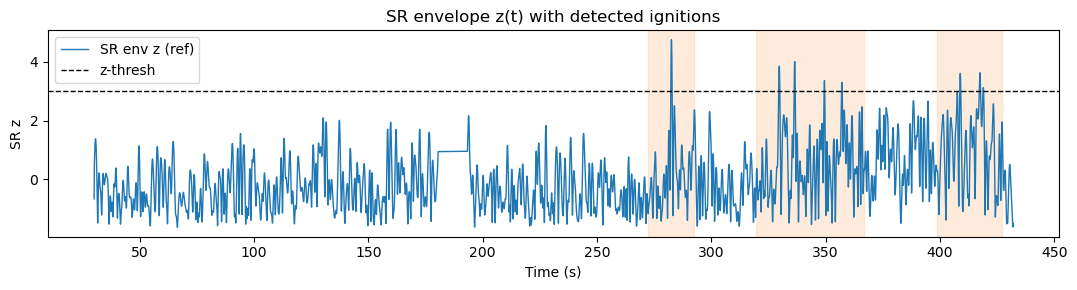

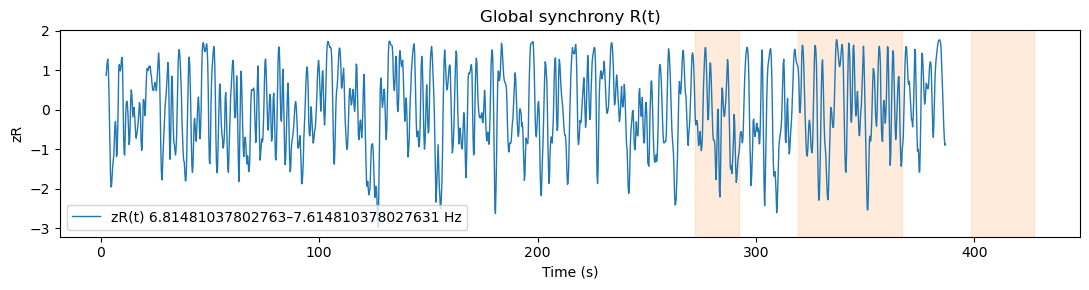

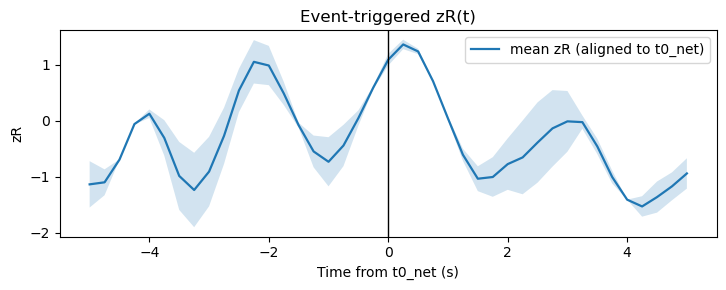

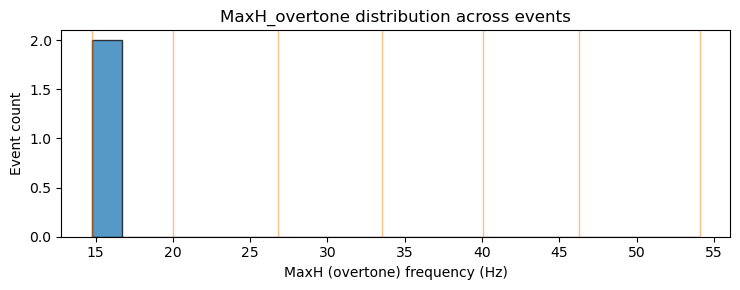


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.8–7.6 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.215 14.76  20.03  26.813 33.522 40.082 46.233 54.06 ]

Events detected: 2
  Duration (s)           — median [IQR]: 33.76 [26.88, 40.63]
  SR z max (ref)         — median [IQR]: 3.73 [3.67, 3.79]
  SR z mean (±5 s)       — median [IQR]: 0.45 [0.42, 0.48]
  MSC@~7.83 (virtual)    — median [IQR]: 0.72 [0.64, 0.80]
  Coverage of recording  — 16.79%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 12.37 [7.81, 16.92]
  HSI (harmonic stack)   — median [IQR]: 0.34 [0.26, 0.42]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 1 (50%), temporal: 1 (50%)
  Spread time (s)        — median [IQR]: 0.13 [0.07, 0.20]
  Synchronized fraction  — m

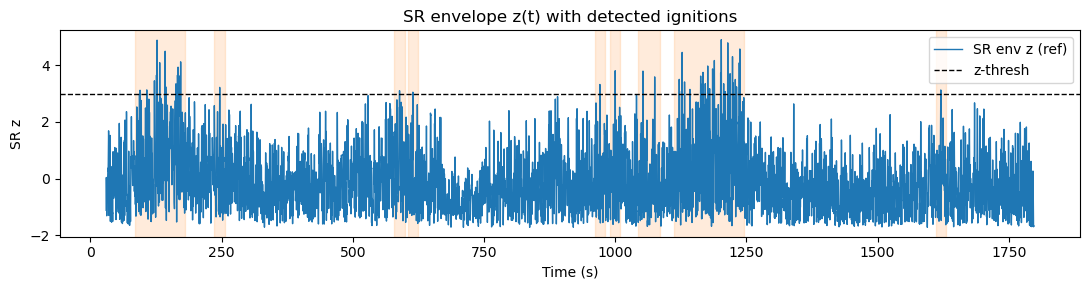

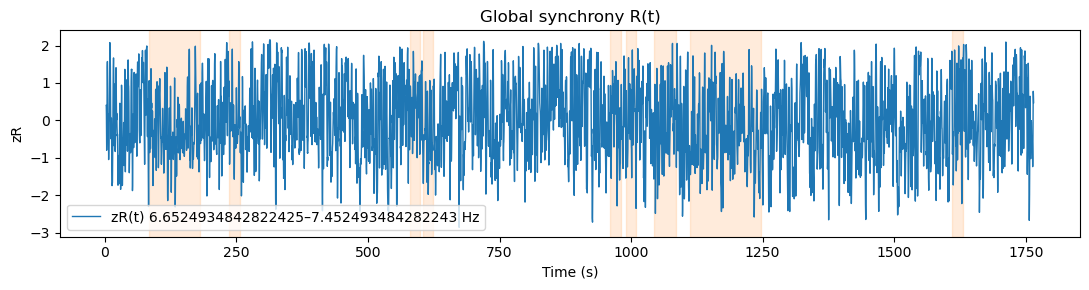

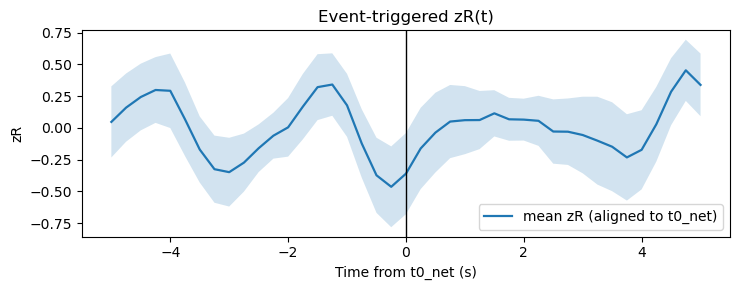

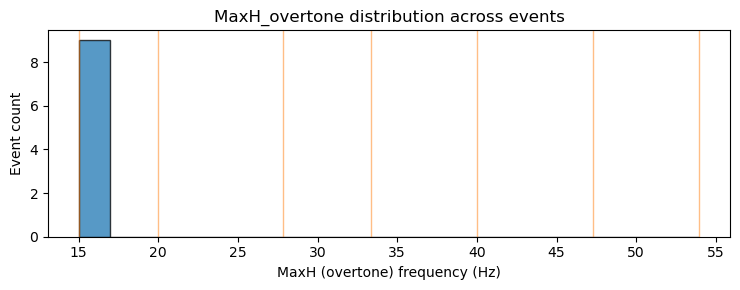


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.7–7.5 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.052 15.034 20.    27.846 33.334 40.002 47.314 53.935]

Events detected: 9
  Duration (s)           — median [IQR]: 20.00 [20.00, 42.33]
  SR z max (ref)         — median [IQR]: 3.05 [2.38, 3.81]
  SR z mean (±5 s)       — median [IQR]: 0.27 [0.23, 0.37]
  MSC@~7.83 (virtual)    — median [IQR]: 0.13 [0.06, 0.35]
  Coverage of recording  — 22.23%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.84 [4.42, 10.95]
  HSI (harmonic stack)   — median [IQR]: 0.77 [0.65, 1.10]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 7 (78%), temporal: 2 (22%)
  Spread time (s)        — median [IQR]: 0.73 [0.02, 1.93]
  Synchronized fraction  — me

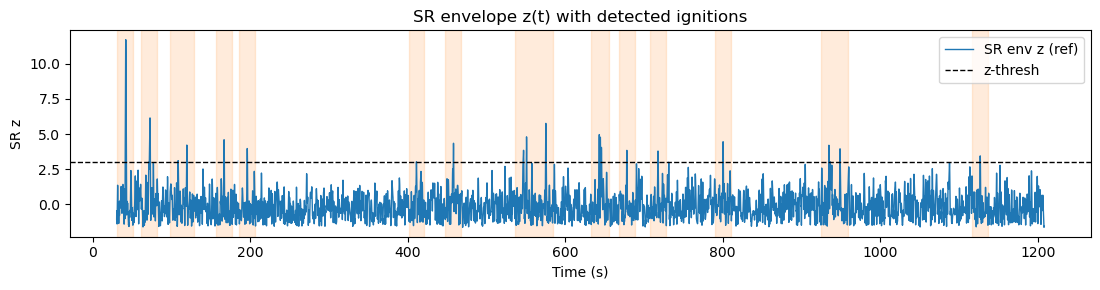

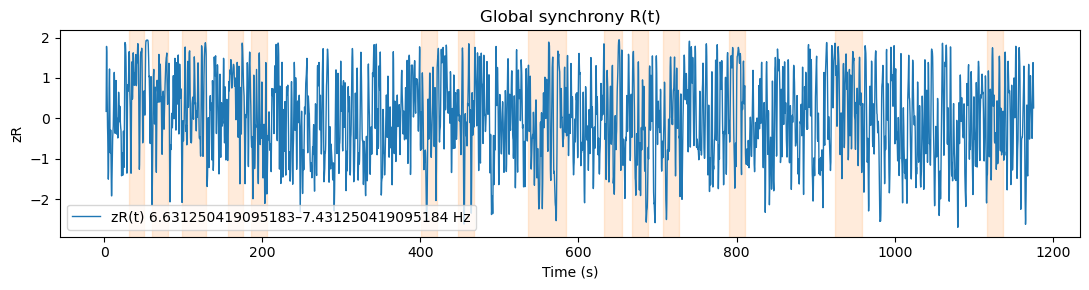

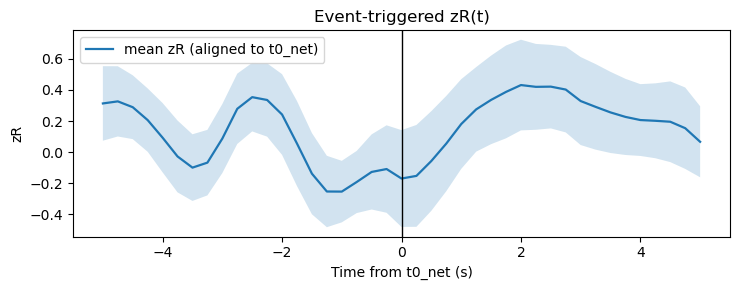

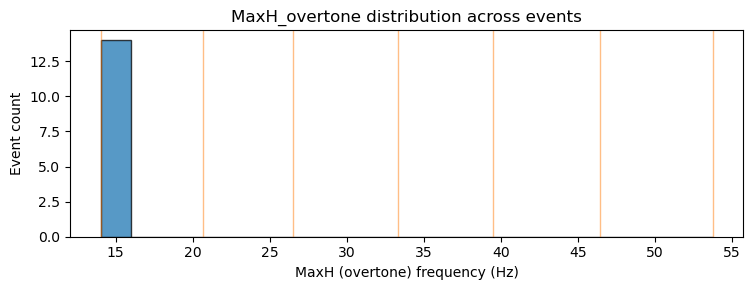


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.6–7.4 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.031 14.042 20.653 26.5   33.343 39.5   46.44  53.757]

Events detected: 14
  Duration (s)           — median [IQR]: 20.00 [20.00, 22.19]
  SR z max (ref)         — median [IQR]: 2.72 [2.03, 3.83]
  SR z mean (±5 s)       — median [IQR]: 0.39 [0.15, 0.88]
  MSC@~7.83 (virtual)    — median [IQR]: 0.15 [0.08, 0.56]
  Coverage of recording  — 28.53%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.45 [2.96, 8.26]
  HSI (harmonic stack)   — median [IQR]: 0.85 [0.78, 0.96]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 8 (57%), temporal: 6 (43%)
  Spread time (s)        — median [IQR]: 0.00 [0.00, 0.01]
  Synchronized fraction  — me

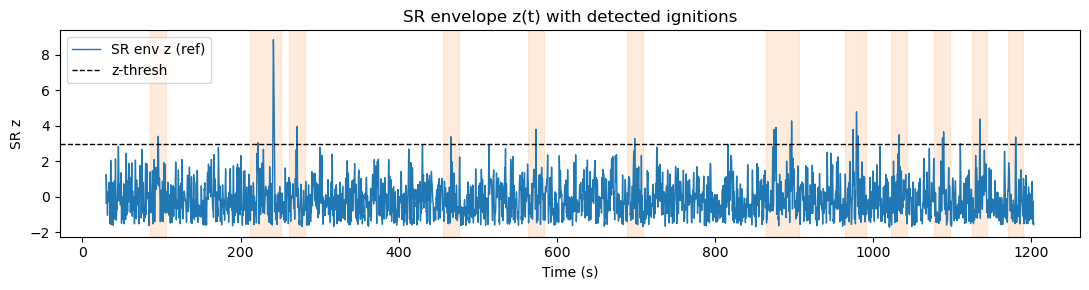

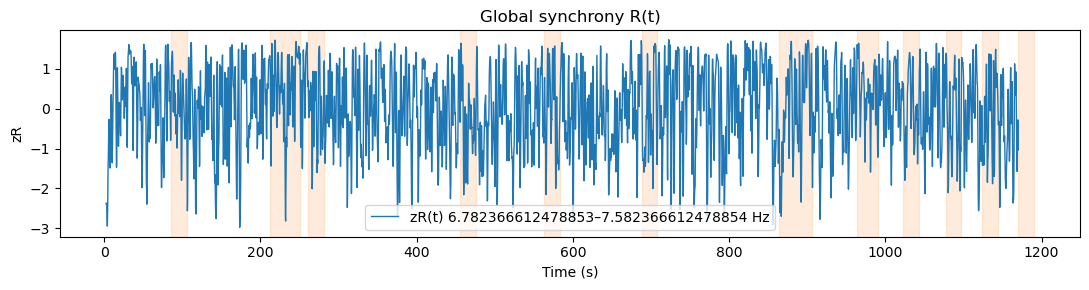

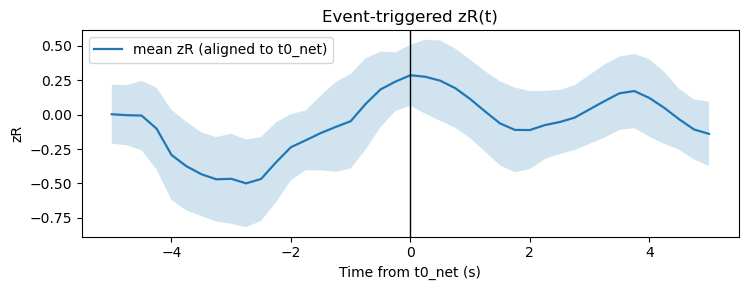

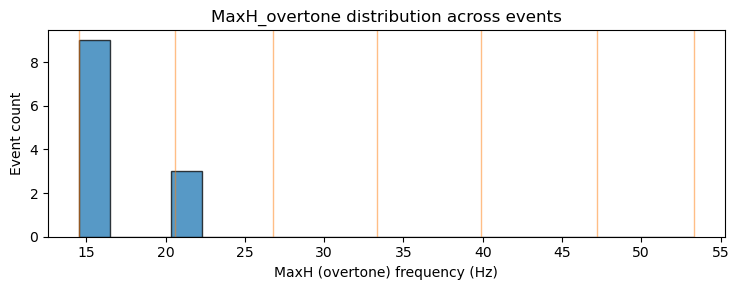


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.8–7.6 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.182 14.523 20.6   26.745 33.336 39.907 47.216 53.323]

Events detected: 12
  Duration (s)           — median [IQR]: 20.00 [20.00, 21.66]
  SR z max (ref)         — median [IQR]: 2.76 [2.26, 2.89]
  SR z mean (±5 s)       — median [IQR]: 0.44 [0.26, 0.57]
  MSC@~7.83 (virtual)    — median [IQR]: 0.48 [0.38, 0.71]
  Coverage of recording  — 24.52%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.45 [3.13, 9.47]
  HSI (harmonic stack)   — median [IQR]: 0.62 [0.47, 0.82]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 6 (50%), temporal: 6 (50%)
  Spread time (s)        — median [IQR]: 0.04 [0.00, 0.10]
  Synchronized fraction  — me

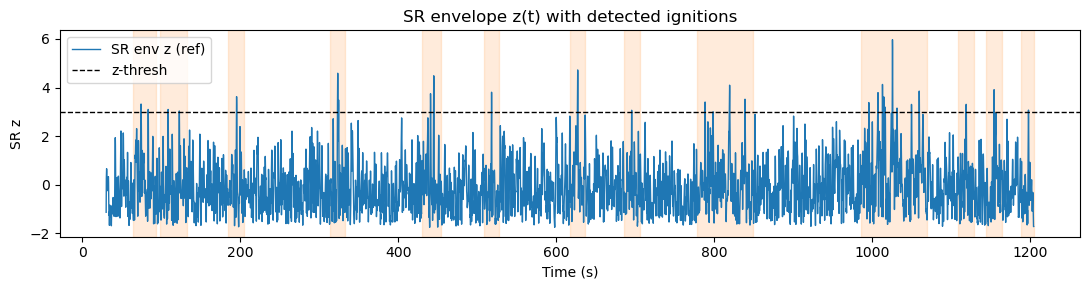

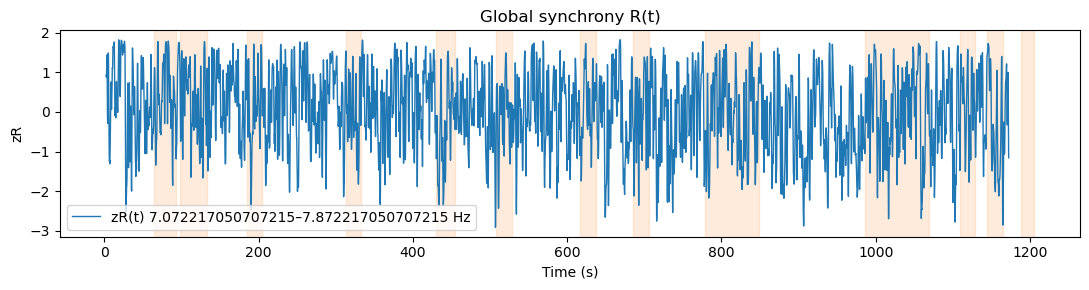

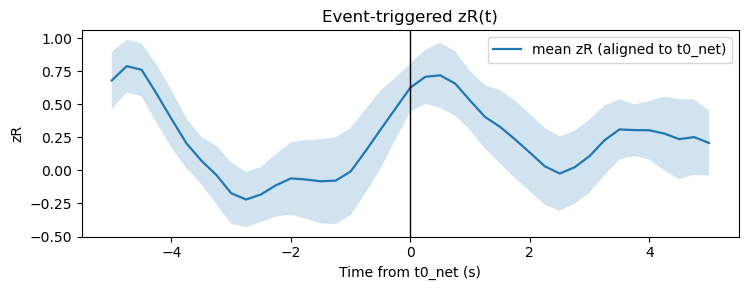

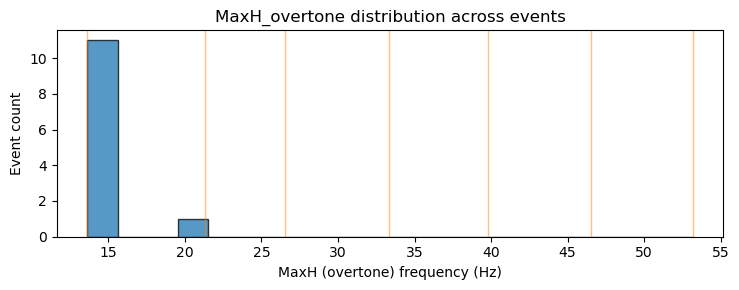


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.1–7.9 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.472 13.628 21.34  26.525 33.338 39.822 46.501 53.193]

Events detected: 12
  Duration (s)           — median [IQR]: 20.00 [20.00, 30.42]
  SR z max (ref)         — median [IQR]: 2.14 [1.88, 3.30]
  SR z mean (±5 s)       — median [IQR]: 0.42 [0.30, 0.68]
  MSC@~7.83 (virtual)    — median [IQR]: 0.38 [0.10, 0.62]
  Coverage of recording  — 32.49%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 7.54 [4.47, 8.81]
  HSI (harmonic stack)   — median [IQR]: 0.65 [0.50, 0.80]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 8 (67%), temporal: 4 (33%)
  Spread time (s)        — median [IQR]: 0.21 [0.00, 1.10]
  Synchronized fraction  — me

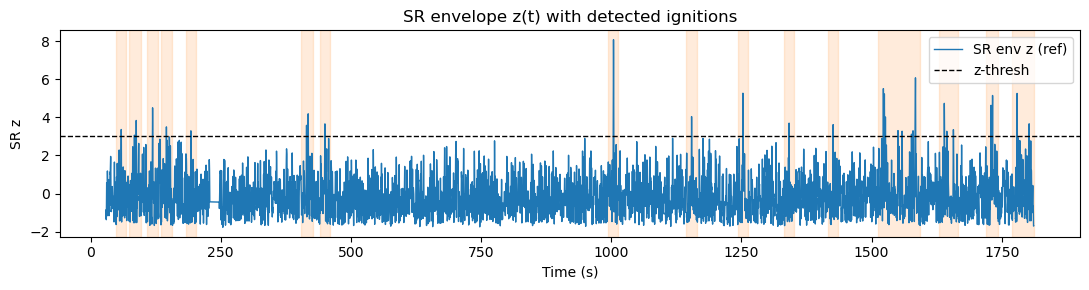

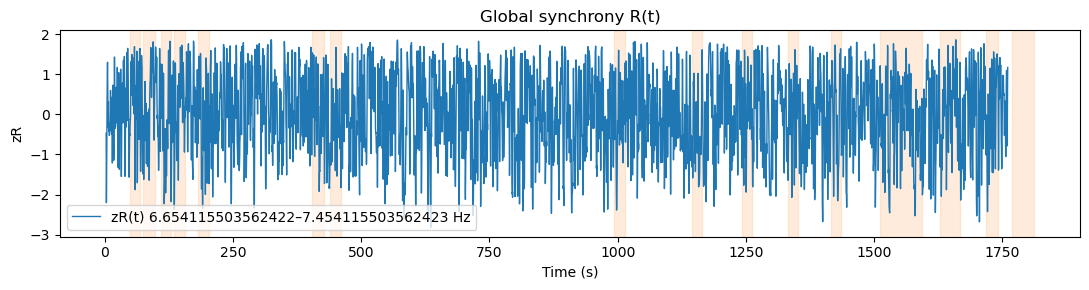

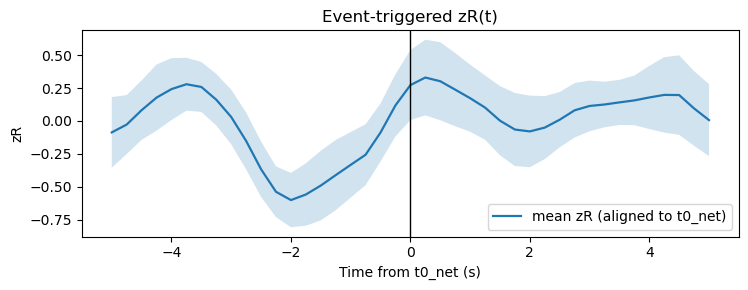

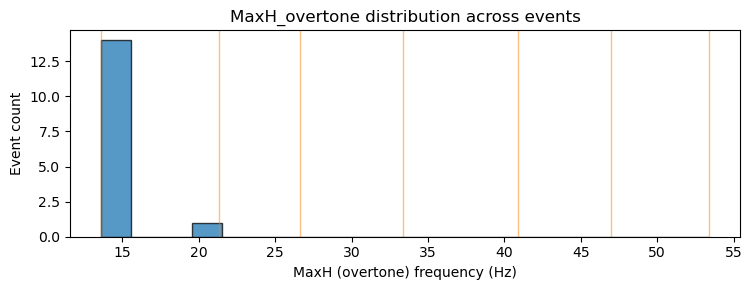


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.7–7.5 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.054 13.577 21.336 26.653 33.337 40.874 46.994 53.406]

Events detected: 15
  Duration (s)           — median [IQR]: 20.00 [20.00, 22.95]
  SR z max (ref)         — median [IQR]: 2.73 [2.20, 3.67]
  SR z mean (±5 s)       — median [IQR]: 0.59 [0.23, 0.73]
  MSC@~7.83 (virtual)    — median [IQR]: 0.37 [0.11, 0.68]
  Coverage of recording  — 21.79%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.04 [2.02, 8.11]
  HSI (harmonic stack)   — median [IQR]: 0.68 [0.43, 1.13]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 12 (80%), temporal: 3 (20%)
  Spread time (s)        — median [IQR]: 0.07 [0.00, 0.16]
  Synchronized fraction  — m

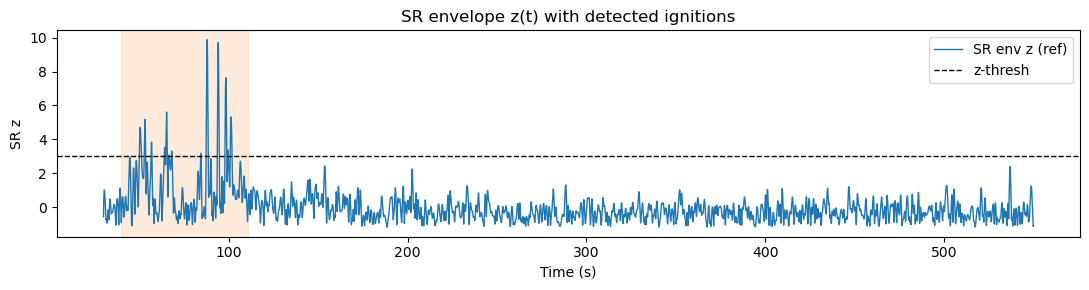

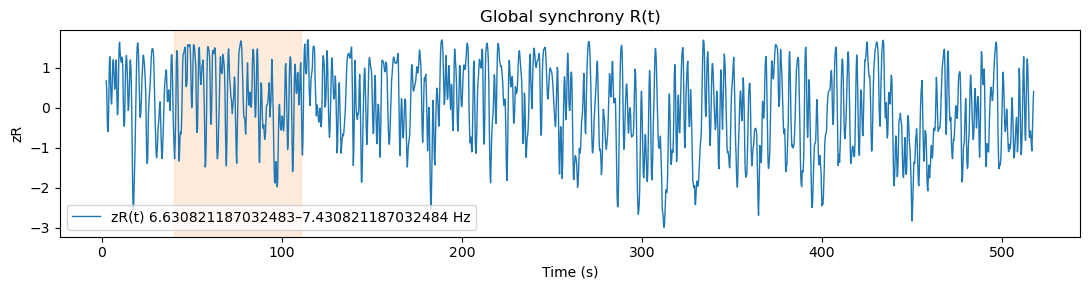

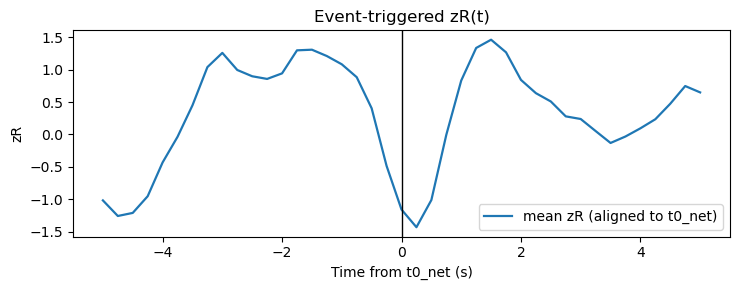

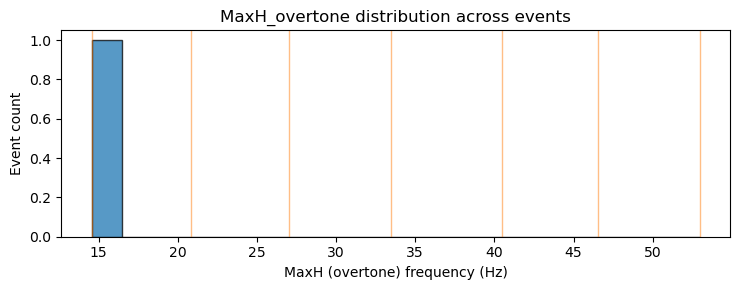


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.6–7.4 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.031 14.574 20.834 27.024 33.479 40.458 46.523 52.963]

Events detected: 1
  Duration (s)           — median [IQR]: 70.89 [70.89, 70.89]
  SR z max (ref)         — median [IQR]: 9.88 [9.88, 9.88]
  SR z mean (±5 s)       — median [IQR]: 1.98 [1.98, 1.98]
  MSC@~7.83 (virtual)    — median [IQR]: 0.39 [0.39, 0.39]
  Coverage of recording  — 13.63%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 3.37 [3.37, 3.37]
  HSI (harmonic stack)   — median [IQR]: 0.77 [0.77, 0.77]
  PEL Γ→θ lag (s)        — median [IQR]: -0.37 [-0.37, -0.37]
  Seed ROI distribution  —  frontal: 1 (100%)
  Spread time (s)        — median [IQR]: n/a
  Synchronized fraction  — median [IQR]: n/a


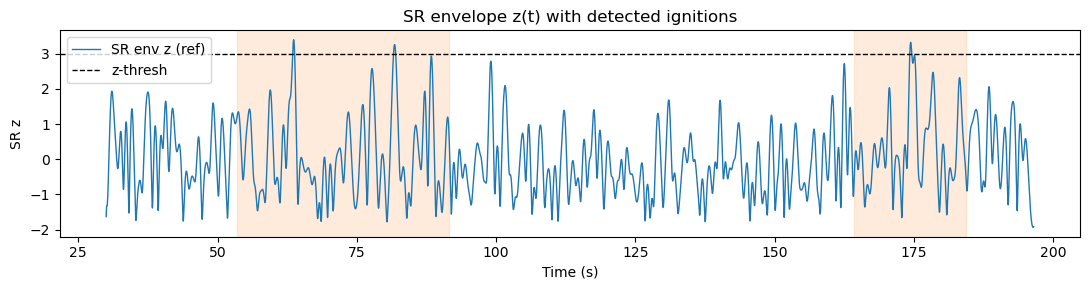

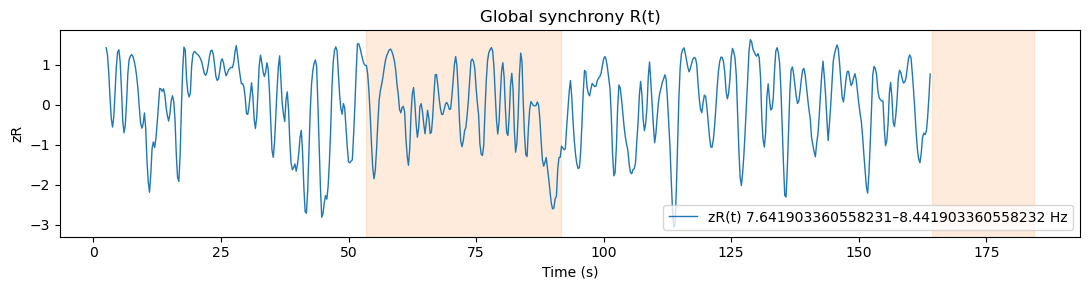

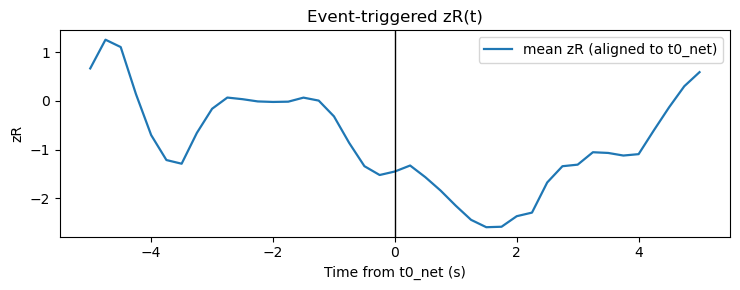

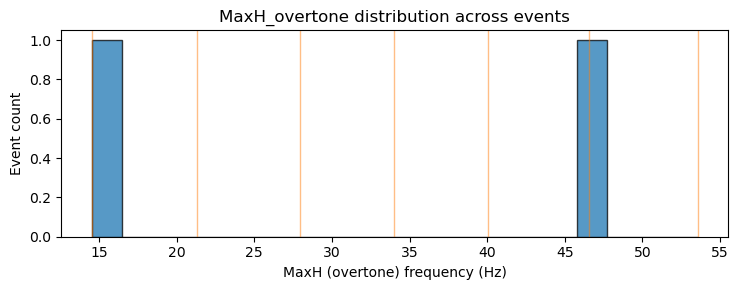


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.6–8.4 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.042 14.527 21.288 27.913 33.995 40.067 46.584 53.559]

Events detected: 2
  Duration (s)           — median [IQR]: 29.06 [24.53, 33.59]
  SR z max (ref)         — median [IQR]: 1.87 [1.34, 2.40]
  SR z mean (±5 s)       — median [IQR]: 0.42 [0.28, 0.56]
  MSC@~7.83 (virtual)    — median [IQR]: 0.89 [0.84, 0.95]
  Coverage of recording  — 34.90%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 2.44 [2.44, 2.44]
  HSI (harmonic stack)   — median [IQR]: 0.47 [0.42, 0.52]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 2 (100%)
  Spread time (s)        — median [IQR]: n/a
  Synchronized fraction  — median [IQR]: n/a

Top events by SR

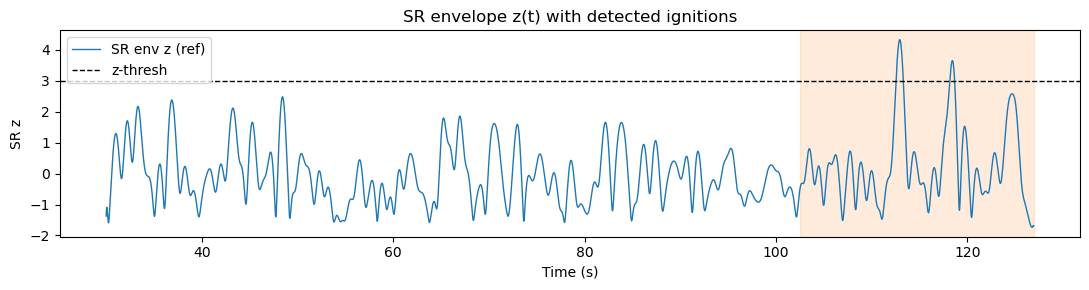

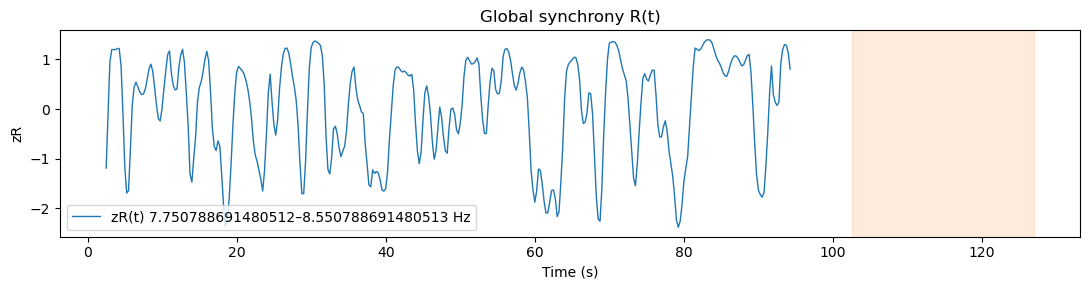


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.8–8.6 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 8.151 14.426 20.03  27.155 33.072 39.901 46.753 53.423]

Events detected: 0
Files written to: exports_ignitions_batch/MUSE/S9
  - sr_env_z.png, R_timeseries.png, ETA_zR.png, MaxH_hz_distribution.png
  - events.csv, summary.csv, event_passport.csv



=== Processing Muse-461E_2019-12-07--13-11-51_1575754159523 ===

Estimate SR harmonics: ['7.38', '14.65', '20.70', '27.59', '33.34', '40.49', '47.30', '52.59']
Ignition windows (rounded, whole seconds): [(68, 89), (126, 147), (164, 197), (204, 225), (268, 299), (402, 423), (454, 475), (502, 523), (688, 709), (749, 770), (787, 829)]
Saved → exports_ignitions_batch/MUSE/S10/ignition_windows.json


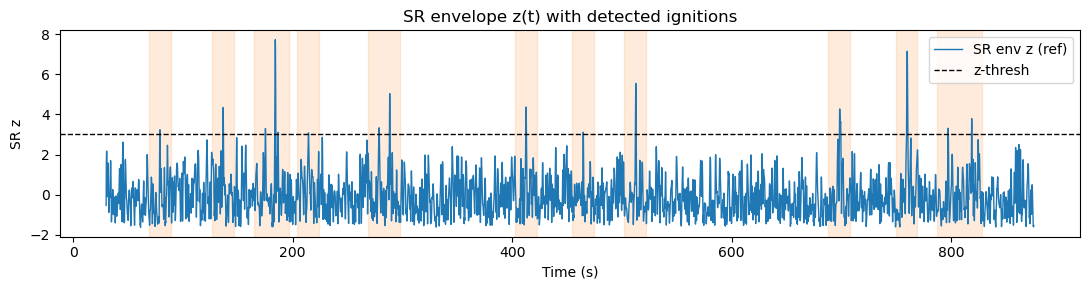

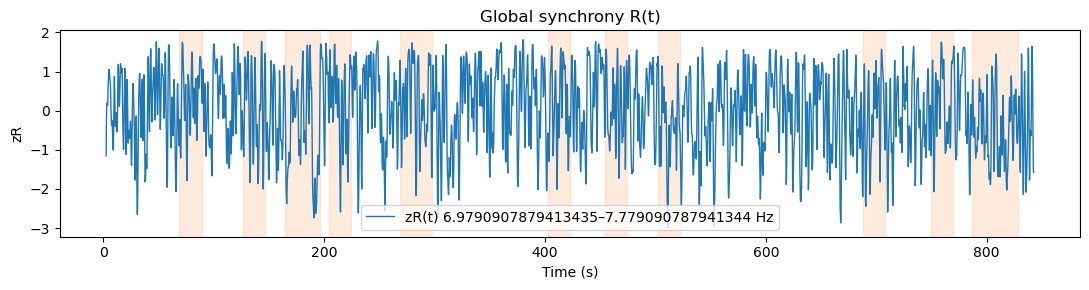

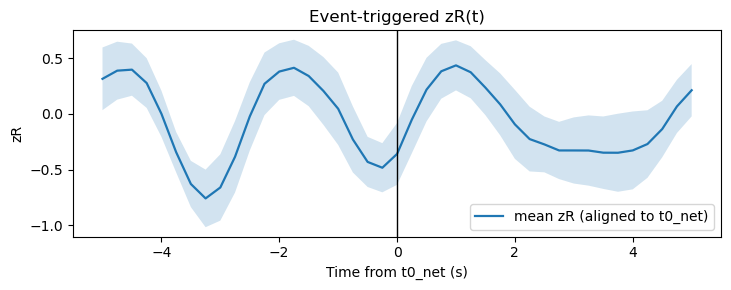

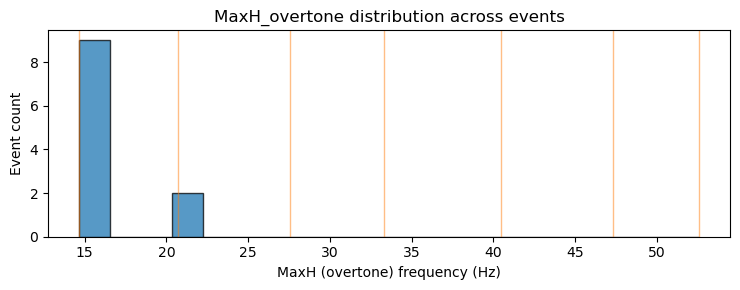


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 7.0–7.8 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.379 14.654 20.702 27.587 33.339 40.494 47.298 52.592]

Events detected: 11
  Duration (s)           — median [IQR]: 20.00 [20.00, 24.79]
  SR z max (ref)         — median [IQR]: 2.21 [2.05, 3.19]
  SR z mean (±5 s)       — median [IQR]: 0.33 [0.12, 0.50]
  MSC@~7.83 (virtual)    — median [IQR]: 0.26 [0.07, 0.87]
  Coverage of recording  — 31.07%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.85 [5.04, 11.79]
  HSI (harmonic stack)   — median [IQR]: 0.85 [0.54, 0.96]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 6 (55%), temporal: 5 (45%)
  Spread time (s)        — median [IQR]: 0.24 [0.00, 1.24]
  Synchronized fraction  — m

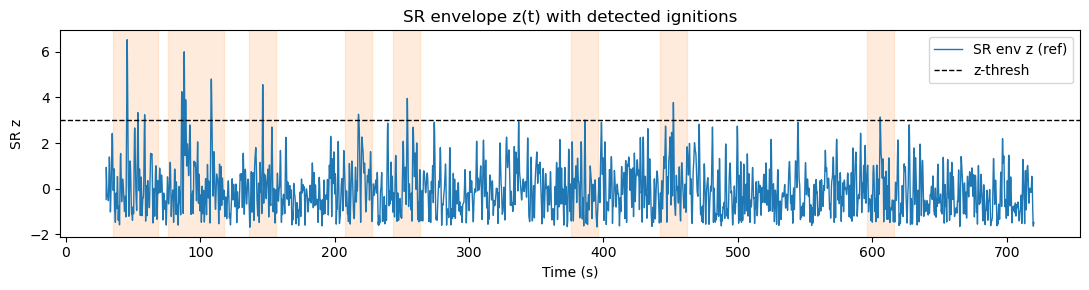

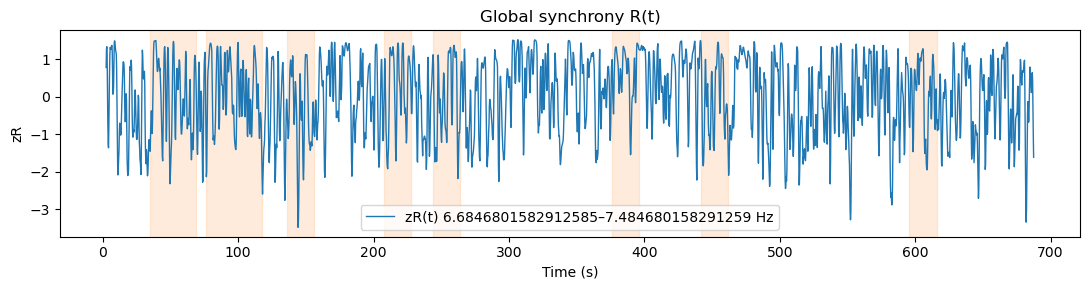

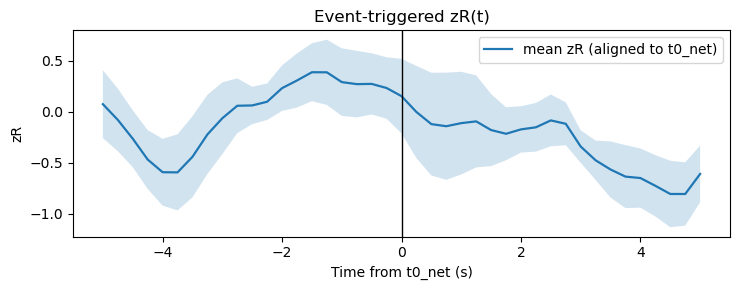

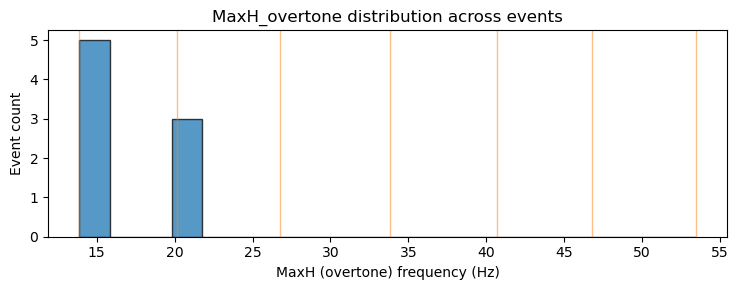


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.7–7.5 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.085 13.87  20.133 26.787 33.817 40.663 46.748 53.463]

Events detected: 8
  Duration (s)           — median [IQR]: 20.00 [20.00, 23.34]
  SR z max (ref)         — median [IQR]: 2.86 [2.41, 4.16]
  SR z mean (±5 s)       — median [IQR]: 0.45 [0.36, 0.62]
  MSC@~7.83 (virtual)    — median [IQR]: 0.36 [0.18, 0.40]
  Coverage of recording  — 28.29%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.86 [4.40, 11.75]
  HSI (harmonic stack)   — median [IQR]: 0.88 [0.46, 0.97]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 6 (75%), temporal: 2 (25%)
  Spread time (s)        — median [IQR]: 0.11 [0.00, 0.44]
  Synchronized fraction  — me

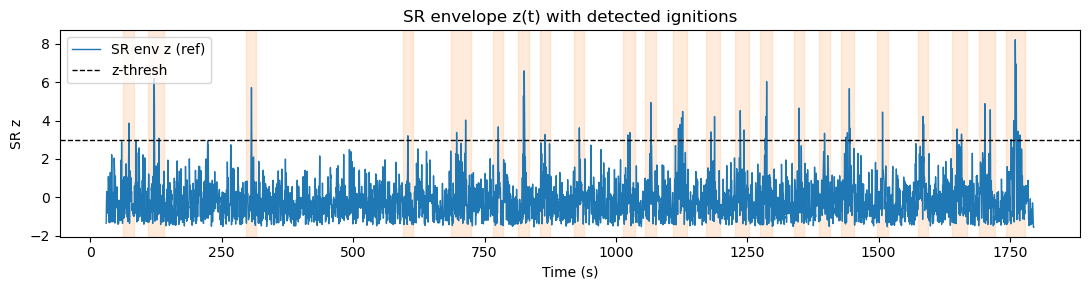

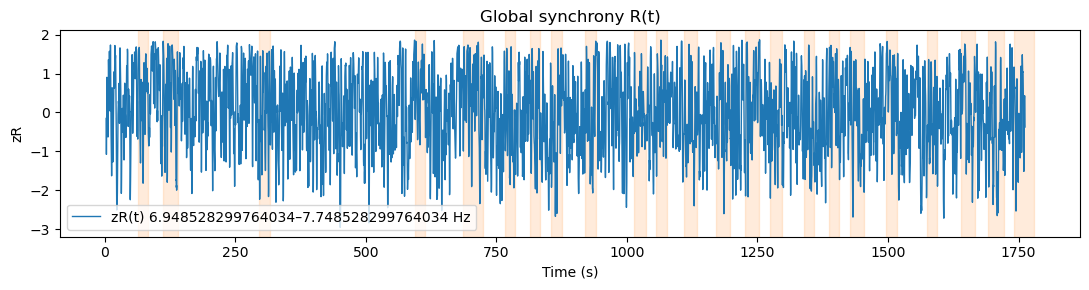

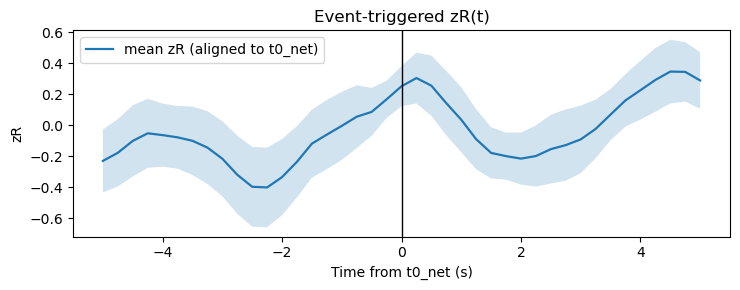

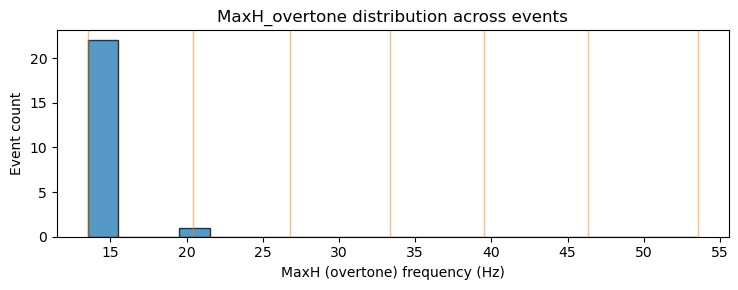


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.9–7.7 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.349 13.5   20.406 26.781 33.337 39.5   46.31  53.557]

Events detected: 23
  Duration (s)           — median [IQR]: 20.00 [20.00, 27.07]
  SR z max (ref)         — median [IQR]: 1.95 [1.54, 2.35]
  SR z mean (±5 s)       — median [IQR]: 0.72 [0.57, 0.95]
  MSC@~7.83 (virtual)    — median [IQR]: 0.13 [0.05, 0.33]
  Coverage of recording  — 31.42%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 6.01 [3.45, 9.89]
  HSI (harmonic stack)   — median [IQR]: 1.19 [0.95, 1.43]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 14 (61%), temporal: 9 (39%)
  Spread time (s)        — median [IQR]: 0.04 [0.00, 0.21]
  Synchronized fraction  — m

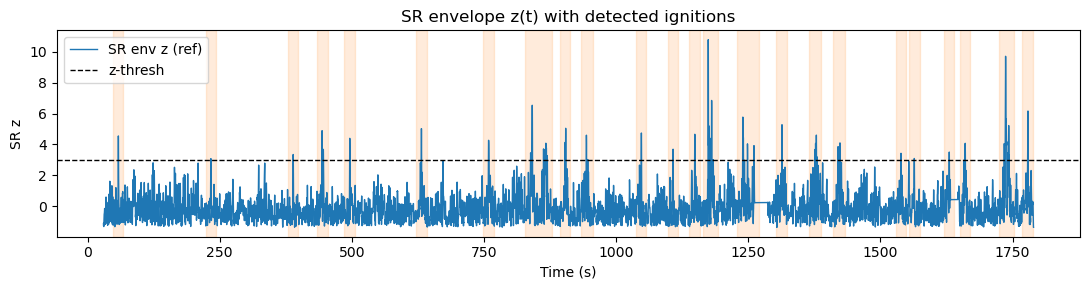

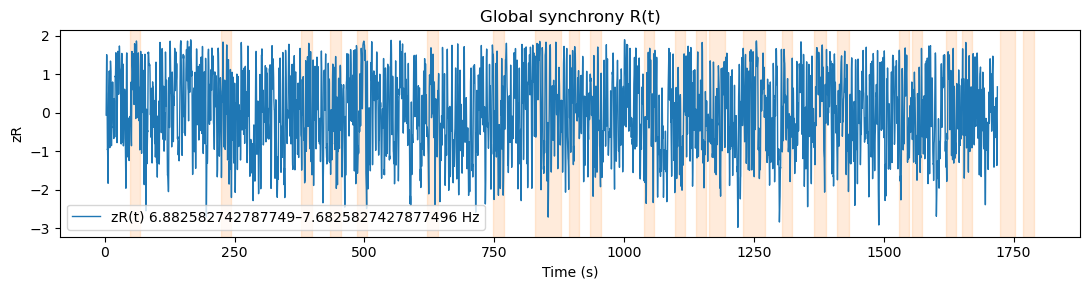

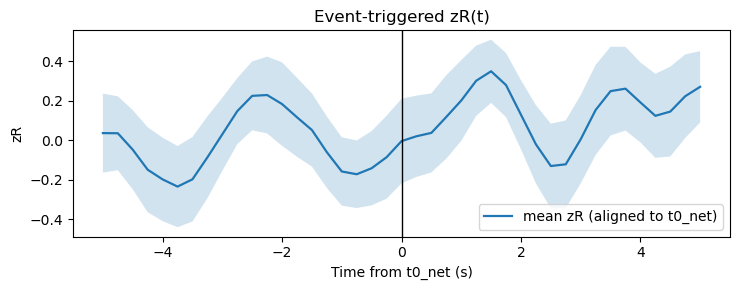

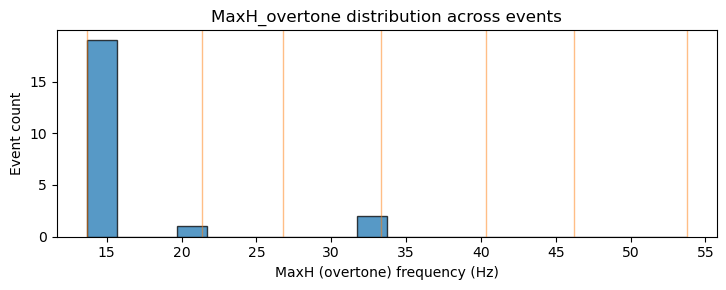


=== Ignition Detection — Session Summary ===
SR reference: EEG.AF8
EEG channels (n=4): AF7, AF8, TP9, TP10
Detection band: 7.83±0.60 Hz; z-thresh=3.00; window=20.0s; min_ISI=2.0s
R(t) band: 6.9–7.7 Hz, win=1.00s, step=0.25s
Event SR mode: auto-SSD
PEL gamma band: 35.0–58.0 Hz; Harmonics (valid, custom): [ 7.283 13.683 21.339 26.747 33.337 40.319 46.247 53.753]

Events detected: 22
  Duration (s)           — median [IQR]: 20.00 [20.00, 22.61]
  SR z max (ref)         — median [IQR]: 2.27 [1.29, 3.76]
  SR z mean (±5 s)       — median [IQR]: 0.91 [0.45, 1.06]
  MSC@~7.83 (virtual)    — median [IQR]: 0.41 [0.11, 0.57]
  Coverage of recording  — 29.12%

— Event-centric metrics —
  FS z (SR1)             — median [IQR]: 4.45 [2.64, 6.77]
  HSI (harmonic stack)   — median [IQR]: 1.29 [0.80, 1.64]
  PEL Γ→θ lag (s)        — median [IQR]: n/a
  Seed ROI distribution  —  frontal: 12 (55%), temporal: 10 (45%)
  Spread time (s)        — median [IQR]: 0.18 [0.00, 0.71]
  Synchronized fraction  — 

In [38]:
import utilities

MUSE_ELECTRODES = ['EEG.AF7','EEG.AF8','EEG.TP9','EEG.TP10']

# 1) List your input files (CSV paths)
muse_files = [
    # 'data/test.csv',
    'data/Muse-461E_2019-11-28--16-01-03_1575083390915.csv',
    'data/Muse-461E_2019-11-27--19-26-58_1575321084010.csv',
    'data/Muse-461E_2019-12-03--12-47-46_1575407413023.csv',
    # 'data/Muse-461E_2019-11-20--21-13-30_1574381977511.csv',
    'data/Muse-461E_2019-12-03--20-53-25_1575436553405.csv',
    'data/Muse-461E_2019-12-04--12-05-39_1575491284751.csv',
    'data/Muse-461E_2019-12-05--12-17-34_1575579123713.csv',
    'data/Muse-461E_2019-12-06--14-36-37_1575672417939.csv',
    'data/Muse-461E_2019-12-06--20-54-24_1575694700892.csv',
    'data/Muse-461E_2019-12-06--20-57-59_1575694836983.csv',
    # 'data/Muse-461E_2019-12-06--21-00-26_1575696038038.csv',
    'data/Muse-461E_2019-12-07--13-11-51_1575754159523.csv',
    'data/Muse-461E_2019-12-07--18-28-16_1575772914160.csv',
    'data/Muse-461E_2019-12-15--15-20-11_1576454995317.csv',
    'data/Muse-357D_2019-12-17--14-20-44_1576623304487.csv'
#     'data/Muse-357D_2019-12-24--10-52-16_1577215680302.csv',
#     'data/Muse-461E_2020-07-12--13-30-04_1594576299757.csv'
]

# 2) Output root for all sessions
ROOT_OUT = 'exports_ignitions_batch'
os.makedirs(ROOT_OUT, exist_ok=True)

# 4) Collect per-session summaries
master_rows = []
sc = 1
for fpath in muse_files:
    records = utilities.load_eeg_csv(fpath, electrodes=MUSE_ELECTRODES,device='muse')
    records = records.iloc[7680:-3840].reset_index(drop=True).copy()

    session_name = os.path.splitext(os.path.basename(fpath))[0]
    out_dir = os.path.join(ROOT_OUT, session_name)
    try:
        print(f"\n=== Processing {session_name} ===\n")

        harms = harmonics.estimate_sr_harmonics(records, sr_channel='EEG.AF8', fs=None,
                    f_can=(7.83, 14.3, 20.8, 27.3, 33.8, 40.3, 46.8, 53.3),
                    search_halfband=0.8, nperseg_sec=32.0, overlap=0.5)

        formatted_list_fstring = [f"{num:.2f}" for num in harms]
        print(f"Estimate SR harmonics: {formatted_list_fstring}")
        

        out, ign_windows = detect_ignition.detect_ignitions_session(
            records, eeg_channels=MUSE_ELECTRODES,
            z_thresh=3,R_band=(harms[0]-0.4,harms[0]+0.4),
            sr_channel="EEG.AF8", sr_reference='auto-SSD', seed_method='latency',
            pel_band=(35,58),
            harmonics_hz=harms,
            eta_pre_sec = 5.0, eta_post_sec = 5.0,
            out_dir='exports_ignitions_batch/MUSE/S'+ str(sc)
        )
        print("\n")
        sc = sc+1

        
        # Store summary row
        summ = out['summary'].copy()
        summ['session'] = session_name[:30]+" ..."
        summ['n_events'] = summ.get('n_events', 0)
        master_rows.append(summ)



    except Exception as e:
        print(f"[ERROR] {session_name}: {e}")
        traceback.print_exc()
        # add a failed row so you keep the log complete
        master_rows.append({'session': session_name[:20]+" ...", 'n_events': np.nan, 'error': str(e)})

# 5) Save master summary across sessions
master_df = pd.DataFrame(master_rows)
master_csv = os.path.join(ROOT_OUT, 'master_ignition_summary-MUSE.csv')
master_df.to_csv(master_csv, index=False)

print("\n=== Batch complete ===")
print("Master summary saved to:", master_csv)
print(master_df.fillna('').to_string(index=False))